![image.png](_paramswO59XJ/3b/Mz/beUi5nfuCDgCjoAjsIwIDFYJky4P31Ph80iWhwvni/C+ubz+lbkivGg+r56Xra6fP1cs/L9oSvNF/ZH5vPpbSA6iNRXh/GPL6qeX8aK8K0fAEXAEHIGVhMBcEV6WleEuFURnH5Ov/Zmj1qx5Wl8MfvKXP/K/oCVlRbhW+zj/uXn4l32P93aOgCPgCDgCjsBR80X48yhE6vOOPuHj//eBQpLl9UtUuO2cy6tXH2h/frwj4Ag4Ao7ACkAgK+qviDDK63La7c6X4Vfn8vCXWVF/7ph84ScntT/uuDX/XVaEmr7n8+rNk9r6PkfAEXAEHIEVjsB8ET6vAuN506Cg5ETUogIkh5tYF7PelAOzPLxXjivrE6Y09d2OgCPgCDgCKxGBLA9vRVDMlQs/Ne3+sxPXPYO2aEjWNitEMF1vvyctsyKcwfHHnrDu/5rUzvc5Ao6AI+AIrDAEyNQtWktRnXL0CWv/j6wI12RFeHA+D/9fGxTzefh12qe07rmy+j22zeWf+GfNY9impsCNc2W9lv1zRfXfEGLNtv7bEXAEHAFHYAUjMF+EPyWGCAikAmwevjlXVu8XAVOE16TQZEUo2E5Whn/165/6xwgl/EMEyGZluIc/hNr4MfVFWRHWq7nuCaGNl/Vz6Sc7sTo2bevrjoAj4Ag4AisMAUxzc2X9XG47K8Jj83n9B1GTCYNjTvz4nG6/OivCpmPz6if4/YL8z/+HrAhbqQ7Lb+KLsqJ+NCvCFdRC+olXn/U/ZUV4ICvCWeznn2lTmZIkIDbMF+Hv2Qfzbr6oP876savrn/MCfwKZ/+cIOAKOwMpCgKJ6WlzvXVkRth/9mvpfZ0W4OCvCvceWIcvK8Ivzef2CuTx8a64Ifwc6KnAGx5Zr/x2/kxLmg/mifrFsK8JCVoQbWEfoqTb1pwTQokVppdl9+J+yIrwjK8KtRpBwSjio+T9HwBFwBFYYAjDixGQWy4/fCm07mtAgLNRvkfW8LglmjUKlfsV8Uf1y3B5eB1zzZZXL7yLc929OXPu/si0rwuWkFlLt6ZNZER7R7WhbAzKFqznw5mNWr/0Pejxph+6gCu0Kewx+u46AI+AIOAIgoHTtR7IibJgvw28hHI5dXf0/mM9kW1G/Qhh1ZfihCo7dc2X41LN/9cx/agii+aTkBtIIZXm4TtvvspIUQikvw11SuqKsvpDl4Xvzef1HWVFty4qwOyvq91ifvnQEHAFHwBFYYQhALogZFOpvRAFS33hsvu7H2mA4Jl/7oz+x+mP/J/sgM8yfVD392OPDv8CvhIBCKFGWQo5ds+Zp9GNaU7M/NdshCNGMzs6KsAWTYbOd/3YEHAFHwBFYIQjgC8qKsA+mG+sIHYgOc0V9IsX3sqLG5HZpVoTrJYt3Ee6PpIawSxOn7lehgmDZp9t2RqJDdbcU7SvCd7KiukBij8r67XNF/aps9cIzIU7Mv2btc+aK6j9lRbh/hUDut+kIOAKOgCPQhsCQNZeHb2ZFuJkqsENTW2TLXY8wIXYoK8N/FhJCXr9xrgyrszwcP5fXv0CWbzHx5dUryQAeyQr1W4hhEjp5LHF+6Xxefx9/kgouBNgm9TfdmxXhS23X59scAUfAEXAEDjMEMIdFrSW8LyY+rT6TFfV5QqHO6z+AHLDUS1btZQDRAJYbFG/YdH37wyyHCa9f+8Eq2otmlofXIYhEAOaRJNGvj1GrY1/32X9CVnJ8Ufi2siKcm5XVJ+aK+r/gk+J+8FmNjvA1R8ARcAQcgSUjwMAanf5SEM9MZHeoILkhK8JG1WoeIJaIINVZTpbl1Svx4cxyDG0pLzGXh7/Wc+/FHzVrH5IFXM49WDXLscQrEQulhAi0rftjDSYSwwpJgm1bsiLsxXxILNQs/XtbR8ARcAQcgQQBiQuKprT9lh0b8gClw4kLgv0Wmw9Wzedr5ymMJ+YwKSu+8Oykq4mrUmCvCPu7yAxdB6OJYHaDPj5XhDchmGDodbVv254V1SkW49S2v22bCtAdpDbChJiWx1AB90RWho9y7DH5ef8oK8KpXNtcGf5rM4NEW/++zRFwBBwBR2A0gF6u/pbt5JRDYIjzH//Ma9Y+hyJ5RjDAZJUCpzFD5KF7rG/iUkxoIsjy+iVpX1FQ1Z8TOnajMB/xQpAbMI3ZMeIfKsNn7bctERhiRiurP0vp4uyP2cXrb1jbact5aOjCzKsCwiZtP4yjKuqvsJ2gXuKmELQqqO6M2lL9fYRTeqyvOwKOgCPgCDQRQNiMyjoMsjx8WzIZRHo0Zqg1HPLc8i/+jZrK1jW7wGQXBVp9Y3Nf12/JQZfEAcGCU9MXZSX2o33Zsap1XEHuO0gNpAxiH1pJvKb6ndaWfZFWLoy7Dc1kqipYTx21716LZjph8tWLWkUhfSvXbD4jK6WhON2QFfWNur5/Pg+/s6gP3+AIOAKOgCOwGAE0ITXBPayD6J2YqtCI5k+ofhwNhRxwsq9c+6xmD9C343H1W5r7xn8PVkmRPcm8XZ9n+2DLcTy/h7noiuoU+V1WL2ffT64O/0pz3906X4S/YN9cEd6Nv4t1rpUcd8N+NKuDZWNQht/jkBF61VGKhQPvpe/mv6yoXiv3m4e3ooWhFSGY5svqN7IiRAzLcI8E4q5eeGbzeP/tCDgCjoAjMAEBjc9BK+Lv/KwI60jJw28r4YBGYOvNrlSgbZ5IchCNLNxFn2hV1odmWriGrAuSLqis304b0VLy+o2s09Yyf9tvSy2EsIlxTOGJrFx4KQJO4o8iwUBKWpjvimPnivDHdu625VAjLBde2rafUhb8xWuqrqTPrAw/nCvDx7LohzMci7bjfZsj4Ag4AisSAdFy8AWpqasLBEmxU4STITGQHVsGWRFO9efwD2ni0luyIuxAADT7IYsCx8yX9S8196W/oU2P+g5fUp/SfnLRzRfh0+wjQwPn0b/daD5oOmRmoAyFCZS5IryIlEMaPAuRQLQfuY68el5WCF39orm8PoYkrnre+6fRzLOiCpgV0+u2dRVslMP4GuSOuXzh2VxTck/3so/sEBOF81FHHcW9i5/OOvelI+AIOAJPNQTmivAaMV/l9dezIjykg+W1mmT0Cgb057157T9su+8saiQErG7PiupD6rwngSmDsAiq+aL6+fZjJeB1ahE88VVRy6gIm+fz8F29vndk5cLRVJKlbwgTBMQidNrOZdvEh0US1rx6JdsQwHNF+H0xocXgWLI9bFSfzn4Sudqxbcs8P+8fZEV4HI2rbf98UX9AA3ph3QmbjiwQmmViZ1aEnV3sP4SXxnNdrP1AFR8oBpgbz81aTKJt1+HbHAFHwBE47BEgoDUO8FKkDtPRuTFljzj6+U1w6B4G0LabiQQDyzUnqXsGWVFdeczq8G8JSCVLdko6SPtQH8quNg0qbSfF9YqwEwE5X1R/RTwTfUNgQDtCy5orq9+MMVES/3OBmsK+I2mFYjLVqyQuqay+MFeGP0EIzRXVr2Wrw3FoUggqYbwVoeaeNZD1oSZbLr0u1ocZwTsEg2SYKKtPcI+SMaIMP4hEjKFWec4wx17SObn4VKDfnMWJAs/i9JilPGxhnwqmjU4XT4DzVUfAEThyEVC/zwePycO/Z6AkoJS7YdZP2W/WNdno3kl3ieMfAgLCLG0nZrA8XJdus3UjN/QiDUhG7/qTMc6nClkRbteAXAZqzHQbsjjYX6VBuedQiC8rqtMkT11RfWa+CF+ESRd9UCJwH5eaS2JqJGC1uhJiAdeDltQnmFbjiNbbPaVLNWvuQnNLtwtWeXVSE6u0jZkqzYyHxmZ0cC2/8YgkkUUwFfUH0mN93RFwBByBIxIBETxFeBOF7tAMuAktTLfbNBfo3KJF5eHCaSaxJghaNmKLDazN/QSQ9hr48/DWqMmFJzDhEWMEGYFifSZEm33LvaxeeGaXD4hrggiBlkPwrGpFt+l5xDfV1me6DdwQdOk2WycRLH3N4vdBI1PmoBBEuD/6QwukL7QhzKeY+jBXZkX9DeKo7Jy+dAQcAUfgiEVAHPKSwibswpnPjYgPRbMJKD36MVh0KrTQSK4leWmfm1bNa9CVaSEr6osww03rC+Gopiup9jqtPYP2XB6+qsJlv/maph2n8UTc4xumtdUg4M1ZWb+9rW0W8+FtNyp5Wxvb9pzjP/7PyQyRpFqCtXgzlXOtTaSIx/Ls+PWyQtI1DTBpWhtfOgKOgCNwxCJwTL7wPzLwWYocSoMziEMS4KayvP5dzFoMvvwWploeLpSBvgz3zBXVb9NHFwD4QsjZRhaDtjZS86hneQdo3pzXtAbrD6HHgG6/WZpGoSw3Sc9j92Dt6AeCgf1mqSa+Dem2rvXoPwuDbPXCC9vaKLX9trZ9tk1SMJWhimbHahsZyC2LBUKf+7U6T/i9wJJjrVKuBSNbf750BBwBR+CIRmC+qF/MwDdX1m/LikBC1GG5hWhSqz/evEGybpPNW2sMSZoeG0ibbdUBL/E9zX0qAPdMMrulx1DJFeJF3DZYhQYhwrEID5pzn6VkdyjDXbST9EDRTxSsr1FALXFG1a+xXUkY2xHC1m7SUlP+7IOO3dYOc1qnOa8IL4LurdeOee7kRabFmOEBX9af079OHh5Txh2FAze3nde3OQKOgCNwRCOgmsoTDJAwubgZy83WzPGW3mgsPSFF7LTCav05fCdpG6GUl9UX0m22LhqCnHOcDGH702VMCyTZxQcIMM4tA3pZn6CEhtvFB1PUH0AIYiaECID5zUgCaBYmgCV5aiwLcSfnUYG8v6mBpdeQrsP2w4yWbkvXyfJNAPHYNq7VSqjn4Tr8YOn+5rpe0w7o5ezTSQCBtfd00cWbffhvR8ARcASOOAQ0W/eDaB0UttOKqvhTzp1W00gEQUyFA/sNv8Zfo0EAQlaED2IWZB0iAZkNSC7Kb/wrBLTC0JsGmNCmRdORGKf3ZXl4b1aEOzEbUnBPi+qtE9JDHr6lGs8ATUXjhRjIKeT3QCZmx/qdURBX2xjcxWdThP0M9hw77XpiIG24mnZyrtXhODN1QuUWM9zqhReyj2sUrS1qahdMI4eAU/RBDXPcnaH3vzkrwsK0a/P9joAj4Agc8Qgo5VmCODXzAVm9ybiAYPoOReWm3eR8zCcneeJUGzgfjYXjxJwmcU3hMesHSrOZpWxb25KBfZTlQOoK7YC4MFdWf0ZQLrFInIdzmqN/Pq/+I1kh6E/THZGB4VaN57lKKe2Py3Em7HomN8V8iM+HviVINx4vpAvN9rA7K8hILtVnoabXmDrb7s22kX9P0xoRoLx3FAisdZTy+uuLTHt2sC8dAUfAEXiqIYDWoul4biZTAPeHmQs2XBRM1d2w1oizmXTvMcA2EA+0D0aYsc0IltV+XgtDDc2hD9OOc6kzXzIWiEmsrH4P7UxMf6sXXqiU9VPFzxJrIp0uOePE31WdIsG1efh1Mkpwj6rJEPwLkxDN7i8n3ZPti+bDgLZyOZqMZrVAG5MA4kSbexgtDPOiHdu2JCuDXifZG5gEnC7aVvQjPUF8lGlfbcf7NkfAEXAEnrIIWP2eZgyNagJQkvcSw4Q5zlhgXWBoPM5OYoc0C7j6m0TrQvPi744mC66rP9Ugtoo/JWYx2KQBrlSs3ZgVEvR6MxqdpB2KZTKu1XISaEgm0HYhDPEzaTmILQiGrvOm2xUHq5Br94BJkEwMmCgRcncguNLjmuuYLrOYKZw+7odJ1/TZKYnh/uax/tsRcAQcgRWBQPSxhK1dudKoCCvlEqI5aj+JTieRAchurYJnNHjjyynCggbe7ptmzjLgNTEr+fMeEJNYHl7HsV359uy4dIlmFNP+1O8kQWwMNK2/nraZtK45/BCK71CzHFpNem9oS5/r6gNaeixrPsxNV7QltMX3ZYzAPubSrvP5dkfAEXAEDksEov+kfs+ki6O4XSzDPb2QHiy2kRkuXGr+m7T/rAhXiVCSUhEiBBi8L7M2mKnI6mC/Jy3NXwM5gnaY60jPgx9JEo4WUuIBDQnT4DX4YSj/oJT2y8jIAAlCfF1aal3z2/3dpPOm+5SyfbltU21x+zx1lSLZYisECtvPUoKMJbtCzBOIebArhsmOiwlWoymxi1ZPWyYInG+aRmb9+tIRcAQcgScfgVhjiIBWqc/TdkFQqiUzQhE2oQW1tcGxjmaTBpZqnrlY70eIENVrLWUQGhTMO/pSvw0CaYOlJ9KsCg9Ac2bgbjunbdNzY3rD8W8EjC3ck5IezhZ/TGTUYVa7E/JBNPFJ3BJJV4n9gWjAdSC4dmdlqOwcXUsNZKX67G6LV7ISEymmIqDK+gT6Ub8XZjxMnJg616WmUKnb1BH7JOxA0S6rAC5d7D80We7F89p1Pbnp2wkTICkw2Tqmt/YWTzYCEKTML32g10IsoZOFDhTFJRwvJAIZhKvT2g6HqEDWBg14fQLhkbbjY5WZPRqPmajy6ssMytZOMiqU1Rd0/0OU5Na0OA+Ln0iE4sJLMbNZfM18Xr1Z20OAeBxtZ5JGINTxKGSEyt2lGUjphzx8064tXUbBKNrUIySS7eqDY9BkklREYp4zYcxHAYHDqOwIG2HIlVVOtVq9LxHuaDJ2DZJtfMRgxMR3EYLU9tsyy+tS+9jTVfBQy7FTomMv1XLt2CdrieBcrsHiYN8DwjzGq1mG+2obWu7BPq/3PzsCTHBJm6VpzDYS9D57L6MjNM7vUoLMCXUZ7fG1g46AaibCJuuq8yPxMkXYK4lGW3K0YdqyARbhpvFKzMw/0rwBKSMulOyAr4VBfFfXYIlwkn7z+iVKWoCogLD5bDPQ1s5jprtU27B9LDW2CA1oS9fsJ2bOrralx6Xrmr4HQgT93KDBwu/IivBIFwlDzHaRWbhXzJR5/cY2zUaZfbdAEVchv1HOc2J1bHoNGkN1VjRHhj2WkSJtw3pWBD6sQdYRhNxsv5y/CRLmHmL8WbiOjOtq1ryajOjTWIbLeS1tfZkm3twnk4c8fA9WJOmnNBkwJVTubvPpNY9Pf09jnaZt29b1PSD/4iX6rC/hO2wOulqahInOJZLBPq+/zjvX1uekbYfjhGEqhmvWPE0ncnyPOwmTmHSP0/bFgPn6Ub4btONp7X3/MiKQlfWHVfNBOLSWy5Z4nA7TFQ+flwBtxjQbq/zKYNQpbF732X8y9DGpGavttjQWaA37+FjUNyWBtmKK00BbO5Y4IGZK9ru5JLbJYoAoUd7cz29NHrsj02SybCNFT9TqtGpsHi5MS2RIctkinNPWH9tiuQsxny0S0naMCraH8a3Fc0Y2ntRvKqoLrF1zyUyOfHvN7fzW8hrCYOwS4m3HLcc2BvNkoJBkuph+SYmkwvw+JhDLca5Z+9AEvw8u1j4HqyIrchxPfKzzJ1Q/Pst5NHfiQ12FGvv0xTdFVeGhGZry9uXaZ9m3lvah8XykjyLl1+unmbnTY1mPRSIjKai578n6rXGCD+HbnXYN8TsJO2e977Z+Y5maMOhLqmrrw7fNiIAmOcUc9kEG/rYBWnwZ+CFOqp7e1n2ScueC1M6ugqOzHDnsO2GxoRaX4VNtfbONAcOSvKZtxgJti3Ars8H48lbbmrNHO061ii0iWDApFuFvbF9zmZHOpwj7SOOjzEFo4XvIhN58SU0Ak4Ov2Y/91owP2wnQtW3NJeY5tMZUiMf7FLPR/V2MQR3gW2eGSjX/kpozLm2e82D/VgG0LyvqR1ONZGQmJqvFYNXBvo5m/1m58FIViuen+yydlJla032zrlO+hHP0CfCe1rc+x8F8Xp00qa0QjzRf46R2bfs0MHxAIcu2/U/GNjNv98naIiEdRdiyHFqeCaS+IR9PBjZPuXNqrrodMeC12sbH2LxJTauDL+MrrXnSRF2WjNNS44d4GfohvigrwvrmIIpPJiYErb8iAaRF/ZasCFub7ew65sqFn+KjbgoB2y+BtiPfFCr7JV0zpFhBNgxE01odjqNfCAnWV7pUn080ERbhkUmBrLEGUeiscqszXEqVr+acULUZqNPzsS5Z0zHr5dUrRymWhCXYep2LNMbEZ2d9azzVF7XvwaH+wLR0h/gA01gq1ULFVNz1bO0eDtYSjaBpDtLSKwMKRS7HeZl4tWkzs/Y9jEvL63LSsSpQe5VjaesHjbXLlN3W/mBvw6w9KXQkPb8KpMcm+X3T9pPWITPxrS7XezDpXCt4XzITjdH+j5ipB4ZYWzkIcRjm1auhSvOANG1NkfpKYraG6kqATfxJtP2dJtg689gRB+b6F5S5J4N0s639RrBh8rLfbUu0Ig0WhWG3i2DbdPDVwXtLaqIhKNZYftYngmCUiihcQ8aFaTOu+bz+/iQfjQ5yEsSqJjT8EduYzdp5bakfFYJ1gP/A2IepP0Do3EWgfAZZIRB0n0LoWR/pkvNhOmUbDMb0/tN2B2tdk93CXHxk8eCv2Tk6SnUsxzVJMPcMZAT11exfjnMvZx+8X/qsxyoNN88xX1Q/bybf5r6n+m8JeF82DUkqULtAOlgvDfZvBk6T+MQF8YJbkbyYzHSyEzRmEAjncxwmPgSObhswA0fLoR8RSgSmNqjaWp58D4MklG8TanEQ6I5tmivCu/Vj/Ni02ZIkg431mu7nGGaWqmUtcM3poKiZJ/YhdJR0cGs8JlzeJiyazwYTp6VOwifR3M9vLQ+xz+jgmqGCjA3XEwTbPCY7sTo2alKSy+9r7Nfs5LfrsRAZoIk/hvY6LXVQVoSLIRLQjwrsLaaNClkl7x/427zWPr/Vx0jG+A0piUNNefgt96WEDAZUhGZWBHwhZzfj1wRPNMiiwkT8k+KnieVGvoRmObom8QVRxwv/2UNZXr1LUjnldYnGIv6SvHpXVoxi7+R9KAOsxP36Dr8XZp36Mc7Kivqdo/7jmphr8/BWIfwUgWwlBf2DMc8rpqWq3jx+3GCVmlkhKpzeRyPJikC6LSYqrX5e6180JHumWC+iheEsMR+eWB2rJrCLOX9qKuWa1SpwMow1+suK6rWx6GP9FrKFmCYr+SH59ov6A+l7P19Wv6FFImveYbsm7i/GMFafAS9lsZ1rLgKYs1LtWZ+7JW1Wa8uLxP/a8BXL9a0Ox8k7TeJn4vfiBO0+Cyux83ONMmkrwtfarEDS14nVsTxryc6S1183VnGX+d/69uUSETAKtb0EMNVge1l38WHWb7Hfk5YS31IG4m5E07Gs3eoX2GEDXrMPcrrhS2hu14F2YNe2aL8QJzSRaPwoL2sOVM1jhPJchGKUiJSPueGohlhhZR/I6F2Ec6axahBosPD0hRVNZtKMNCuqM9GG0sGYazVBjg9u8bUfdRRmPQYgNAx8SjoYcb47YH2lgrXteNuWFQFG21n8toDabHU4jt/kJJR+E9q5Hbdcy1j1NpCLb2NqSlG/HBObT9u5NEPHRoQMAkMF04BEudbGTI+Kx/kRXxEECLcBzDjaquYdGYaUdid1lORHrD+C1jl6fvVXrG+NS+OdxsRIpo7zmdDYO9T0dUb/YviuTmh+Y6ix5gvPZiDjXeeaUrZpfAbVlTxDHbzx2Vxo19C1HGpIHUQcOw4GKKEI/NYQhrsFqzxcp8UhyYIiEy+Erh2nE4ThhIztIvDR/kVbD1+1gpe8P9JnGSoEjExE83Ahz0n80lo004LAzZ8sYQ9F+KKSqHiuvykTSIkbrN8jsXlMLtSHpaSQaC0o6hPtWlmqpeVSmcAU4WWJZeH2VNBqyq5zNItKvL/V9fPTvvRdvIHzkXjZ/HVYWlwgpUgt47rmZZP4HH2gm2wmJL/LcBezjVlOyUvMzAm2mZrEtk80XUUh9njzw+acOsPcYS998zqY4eqH9VY1q/Ci3oyTd5qNPiaBDZ/XUuDXM1tUtp2kGuK+p95BdHUAACAASURBVL14zOJlNqaBrDKjiyXDB10OcH25FzmilQ11RySSLPbbce/M8lTg14KPlKqIQbVNbCb9jgHAo+cay11YyXPJVNFJPJnUb999iUB6EFOjZs/4jA1ypkVrHSkG5+PTvm1wSJ35Vv8pne1aIHL6/qlQwly4iMwxJOOU1Sca5yOWbke6zQR5Gu+VTCheYW1lUC/rE2xChoah76zEL8VvRAgqSTYSyfw+YGC3ftqWfQVSzFQfkx/Tj1V7bhIrskLYomMEAE18PKDUjF0DWpHcQxEutm2YktPEx2amZ0LJn4ZFSIB5NHeLRhgz/Z9YHUvAqT3nuaI+kf5N0+KZpQQGnXAMUpYdz4FjaGvXhLWFOmTkfjTLi07C93NftCNOkeNSQawhLYMm21PNf/unjQvD8/vKDAjEhwVVGqbYFVZmG1aN9ZIV1ZWYhuw3s5VpvhNry1KJCt/Q2c/VXTnW8AchHNNjWVeBRnaE27viCHQWJA7byNLTGT4zrLx6VxcT0M6VzNQQZvdjRksd7dYuXeKbUWGJBoXPZo1oSasXnkm28qbWZcdaafW23HWYMCLDcFxj41gxcXEvlMwoApkmxor5Wf9dyzS6XIXaFkwp1l79Wder1iVZxJuDlbVdjmVislsfzVv17wpRRrU0zoHmpBk2tvMepedVnwjP6zu23Yg2DIy2LRE+19g2nX3vNR+abWcp2TVE266GFYPZrgPRjvQ60JrjQFavtT5U89xov9uWJvQwObMfLRkNL22rYRdTfRUj1tfk4o06cRONmPNo6RgmRWNmw2FAd6Idq29yUcwa5lHu3whAhENYReVoMQhb8MViitPQCMx+b4KpapNFq4SM1pbevwl28ROPmVxjK5uomEUEFwPXgoUn7Yd1Db142DQkzN9pIL2yijn2o7TXd4Z4yJsW9RWrAgxcIDWRWYbfOvhsxV4uswhJn1M/arNTTpHxABJKclaGu9AC0tOTmQBGWbqtuY46b34VzCK8pGZesvILKdkgPV4/iDvRZNrMd2pWuB9fmAkSFa6nq3nkQbI5pLRp+p8vql/WpKX7+HD4bS9tev50He1GCQj4P25F5bePi9kcgtdMI+lxDK5ojfLRJDPNtA3rBIbCLrTtYKJZz9HadiAkzL9nbdKlTgDeM+5/YCYqM3CJ27KJx1i8VMzw8CAfJRqmzjavT/teznWZDReBe9rcNFvaefjoBa8iPGAY277EXLne9um1E2szrEI8EvJhyDDTc+9PZ/PWr/iQovl3jCyjgmZXOnA2BZIyBHdjyrP+2pb2vkd/zXgLBLUx4iAUpX608Zbxl5qeFgmWZlthhyUkDkg6YIsmkLY1gZQO2Pa+NCdRFkxu4wF+SRs7hjgm50zPY+sm1NLQkOG+mM6LSQfay3+1vtmvRTYHxvBVX29rOiydsG5q+pBiPxLLxTeH6f5DbENg8dt8rHY9LE0Lc4GUorJM6/ri71Tzya34NNIZpzwATEJF2My6ftxoBI+kWhIaBQ+QD33apaECqwMVBzyzkDWcs8lqa+vHgkg1G/ipaHIII9oi3DSm5oHUjANpQ+3+vNi7eKFI/TPyFYSL7aVuOyfbGPAknikP34ovbnx5zfcBFurg3oHwsH7EFFWEl6lAgSq+dVpSWNUcdqm5wxzWD3DN6WBo52guLcYlHciMqILvg/bD3+ksuFw4Omp2MBHD+9RO/5gN9s3zHOhvNU8K7XtceI561pkrgn978971uTKr/YEdob6mdoGUTKpEI1P/hx1rS7QrHZzOtG0sNdnu3tR0PNJ2g5hPVSuAsv5Y+n2k/bCeaHcn2z71IQXMjvoM8fHtmZa1wgbiprCwfm2JpSP1S0YyAe/xOCFDM/ePaQAJ1m3ax21qEnsH742dz0x6k2L6aGsCKRWA1ofsl7iwmKYpNenrxG0okEYps0a+P+tHJxOPj57JYJWEZAhDkcm4TMgxsUsuTvNdw7a1PmxpZmEjgdl2Xy4DAqpGP0xXzHLkQ2ykkhHtB6cwjv4ywE6SGUvKXLIPbNpgm14yg4LGOwlFuZnJWth/Rf0ByfxdhNtxaAoDKdKvyapAslQRMrG0RPgOH93w+oqARnV90i5edzxmB4KpK42QXScDImYVNZPZ8QhSWydpK6mCLC5poFrgTfqRMuDSFrPoO2SQlwwY9Y0x6r++CA2rqSGY014Yd5LmJaHl28V1LFXjeyydDTJYqclUTEkIN64v7UIHfxK6DrCp6+x/X9vMNT1uqeuaRBZsHmvef9qn+UiawcVos4JtkiXdzFcp4xJBpuzDobbH4MexbZqsCaR0YsH16Lu0NxWMsSSJkBOGkxAmVvRtg1t6L+bb0IkgDNTfZ7+aUHmX1lt7fWYD83vY9uZSJzBM7HZ1U/wFq5vSvgw/TF9pn+aHTVmayoJtNYcNfS1F2JpOghj87btpho3wbdskxOKomgLJ/Dtcm06YKT8jE2O2aZb8oUAyP5CYvBtZPjC98Z7Z/WOq1ndHAtaH76ImLeZ9HBJPyvqXUnyU2TpAa0y3+/oyIKB26lvpyoI0mx+i2tv3YGaIFErxz1ya+pVMdZ82G2q7ZD5So3PafhVUDFYPyocZ0xhB95Xy4fbhyUsIe0iERv0BMdnQluC1PFyowoJ+aqFN5wvP1iJ7n7JztS01G/YZqjFwTgQgM/UzxFYt5o76Rhl4ivA1VPvYpjqNJSQH0cLy+hfsQ0syENwmGhPXGQsGIuDWG8ON62HQSxPQtl1j2zYbaGNutdiCgYEPWTHdhP0eBhsDT9qHMKKiL+wOtqvDfr9hnbZdjnUc1DIoxMH7BV196mCIU/phw1KulazmZbgrFRA6eWGweKH1l5j2Rk7tk6qnq5DajjYtWS/y+o0cY/kWIU1YHywj6QMfxSilUcxYPy7YEnNcjAPDLAztOQ9fxYwl5yjr13PvxhKMA6Dkb3ycTBFKekFAoe29LTr6uycliQ9U/IJo5mCEgNDJx/b0/eIazOTVJCzp4D1IBYKZJrOi/kaKCesaT8Y3toggEnM/2uStOpNnrgSg80cCiYlkGHtm9IvmxLXb+eQbSQgUanUA4yGNXH26XAvFK1/Gu8Pz1cwvO9Ha4gSlOkXfvTrS36vT9PfFkD9Ee1erD8dy3fJtxckwPlxhbU4jnNi1+7InAmo6GzmFRasYMXGsG511Y0LYKya3vP4DPtDh/hh0x4vwxDQTgx3TteQjlZcjD69ra2M2XIt9sDbM+FSzKLKigq3FILbDyqoP28XZ0X4z9dl2lviA4mBdP0p5CD4IMQVG+ugYe0fNl4/oTEpMaswWodA2fWH28bcROuLsWK4X+3cr1Tu9xknryczvHtOQzPzA/UZ8xPzBbPMdaV86KJIC6RS266xxT9PZnh6zlHUlKiDsuQYGXeLC7miajtK+1WR0cTTVQpdHs6y+zMBLOzGpks1dYoWquxH0DCDqT/uKUbt5L4YDYWRnMslg5v/D6OOsXxzJC0IF/6FkkY/xMWuHfWP6yusXRPIMQeGC5x1YGIaYF+E1Wg2Yb4K/W6J/8qijoomNyYwcdxvvBvegpAMmJw9rfB15/fZIYHqDeJBiY+tznDNqApyP47AgkID3VoSktWMJg02CtuM13GDaZ6Q5c11ybZfzHsv7I9YJ2XYngiD15dCfEKIkfik9S1xXvynPWrCQ4HLRLgarRDiV4S49HwH2p44wFJbdRogqUfjUF5m5FKz4PuW4PFxnQkknVbxbaIyc74YYLyYVCbYi5Jg8i8Yl56VNdYE8k1GYx+VYC7h6/W6tZA0TyQ8ouUUYmgivxXfsW5aMgBAWipAUjpN0Pbvto7WOYYzxgC1gU/0LT9iLGSmlUi9oPx+GHTfrcsj8KeoXx9m+REVj7iIjw81ch8x6ivA1i3HiHMauUuclL+LDkpCUGAit5SS00zJ8VGd0j/Oi2vVpbA8CVz4aBsvU7MNMHKziIFSdia9Mnbb7RAiZCSDGl9xAP8wq6d9YW7CPGNwjIaK6W80Z15jZhrpHBImaX8qubZalZn0mXmbD6OOlHEXMUJ6QBAYpk5JzWG5CG+RZMrAtf5r9wSrMHVwfAwgaHDPNPqZB0U4hx7QkM+W5IlQRTggiGdjWrHka52Eb55LJ0po1TzNMReiKxhO1DwYiroX2o+s67x+BG8+F7ZjIeO85B/2xjfMumi2vWfM0NPgmkYZj6EOu6VVrfyQ9jnc7/fbQ1NP9dt2TlmAjWh6z+desfU5bWyYnnMeu3chFYJXeJ5jRjneBtmAizynBkP75Vm0saDuf4JOv+7Hxexms4jj6pG9wiWSdkSbId4a2mJJU6J+UZnb9WHDAMz0vWhC4232hMXNMSliS+0rMblw/zyvth3UsODx/m8ASgyWswgYGzeP89xIQEFNW6uyNmbZ32yBpXeIbYpBFDWabUjJ32yCiJi38NVejddlxsy5l1lvU3xjapcvwAzQOmanEHFL4hZhFEpwocTw6myRORVh+Wo5CbM1qX5frtrQ/si1WaX1Qz0Of0ffDYBdVfBEq4nCNqvt+PsokiJgYCUyIwtyyuCIGFO5ZZlFl+CEzLzWPQas3gXdFFKCYDcS3s0WEU0za+oTlqpsVO+zjCNKo9daPmslFI/9HvgkCn/ET5eFfpudgFo8937bFCUHYy7O2bb50BBwBR+CgISApUxoZgJXJtsEcgJxcg9R2MJPhtwkkm/GoSe8MiTDPw/f6XLBSpL8kpgN8KXHgJ2JaVGSi3dv6UWeslE1gYFWzxBZzIivTCZOFMJgijbW+kWu1+BQTVHJ8WX3CtqfnEwJHHr4tbYZZjger8O2ouWYYlKfa27AMRFaIfwlzlAQB0gfO7qaZ0c5nznjYZGoHp2LstZTMwM9nszNr37ZUX8l+9ec9ZPEl6rsaCiTVBp9ghmj9mHPetDq2m0+x65rtWF86Ao6AI7AsCKhj+QlUauuQWb4MoEmGbzXnbEe9ph3CAjMQKj1/QqeWaGzs2PWjJrisz+ZSB0W0mm+jLSQU7Ggyy+uXRE2GPGOL7bRqetrANXAu1QJ2GotJHZ4PyrWW9XOjQBgFSyqleo8F9DWvL/1tZITUv6NR4g+k/RsJQUyDRRggRMzpnWYJsL4lkzqBrnn4dbapJmUmQ6sI+yeRwVfdbSY4O7651LiSvTwPtEFjkGl0/A4zX0QfRrXNftOPpApqTCTULLvIfNs8r/92BBwBR2BZEICgwGCdzozpOGbwrj9nJ1EWzyazwaJFodlIW60fw4xbfUD7JsUjKWtvu0VFq9kKJ+QtomkQDBezHZCDbAPX1xagpulX9nNe1Yr2w0jimkyoWloRCWAloJckjWgdorG0a2B2z+lSSRLiAE0o2UIKUDbfzdaeoEgLuETY4IexYN1hmxgbBVWcP7S5S7Fha9kNc3hvlkwK0RRHwbhhtgzrJ12qOVFMlVGI4jeK/hrBUEtQKItsnwlv+hDNrAhvSvsjuSfphdJtvu4IOAKOwMFDIA52DIqnpifRAENYKR+KQWMS33OttVEmkGb+lSzfkmJjSA8t1z7L2kqmZASY+pbU5LaXwVLThmxq0r41NkHYf9ZnpHGGf2++D9WMHrPoamUMitbCuREUmBL1fGQEuF5NaWc3BbBd66Rl1Cbrb0hCTdhcefh2LJInvjUhchijjYBJuYYi3AcZwvplv5r7IDDcyT0om22Q0nLRRIXuK8K4foVqlHvATKi8lP8uqt82kyn9a2DuvawP+ywXXhr3kRkjfIz1oW8INmBZvT8J9PsZ9ts/rdq7YL996Qg4Ao7AQUdAhY+YtyQINtIfCei8TzMi3KsZHPYrMQD/xmYYScJUEXJBNDsp82wvg57k64rBrGaG+iA3owSJe9UPNRbvwDFCUoj0XfHJMOhqDJD1AzX5tdJXEd7H7D7VBIx4YX4RtAPucTmB5Jos07MkbdTOIykj3MJPi0cxlpUFOur1kO1C2I0IH/CV+kRF+H0TuPSh/rw7EVZoUuAtGqZqeUo5r4W5FdMSSQyRHnu1ZUdWFiTEClKk3EcZBT2WHIH8QQ/eg/+K/o0ZaIJVb88XjoAj4AgcXASESispg6RMNoP3pTjG8UXYmfGHCI26CJa2/1YRAoUEmO0wH5RGS5OYk+wFDLqS1j3Noqt5oqi0+nkEnp3DkiWOZ1aQtB5UkMXf9E36V//PXgZOGZwRiGX4LfrRKPlboilSqOrrLaIazQLtBJOVak1viESK+j1Sm6YIf0osCaUGOAckCYRjZOJVrxV/0OqFF3INnBftJvpjwlZS8YgATkyBUTuLpdBjJmupMvkzIvSpWRRZi+/W8uTgDnsQssbjFkCpmao3a7aCoVkQE2WMIxGMYQluxRSZ5lBDMHMOfFVDzY1nQgLMsn5u+nyZXKh5kQS3BP4RrHiFPRtfOgKOgCNwyBBIUu68YdpJ1QdxZ6wXVG2zwD6O00GNtCnfj4OglCMfDqTSJvpPGHwZhMUspz4gtDL1y9RvVIFGG2HUDTWNcu2zONZiLLSk8E4184nPSfvm2N0xgE6i4Pltf5jwSJND+wc0MI94J/Jy3SaaYSzIRvzTJtUQ7Zrpg/VNjeBH6/t6LQo2TGsSTZ9BtFDBIGp2tCd4F9/U3ZFgQRJUGHqRfm3ZEmiDsE2fjWqj+zElau6zeE9pfroi3KSaHBieG2Mx0l7G15lYDMuRFP1qYI330OPXmjVPEwbf6vr5sBt5rlwXIQRo1kyQ2M77g6Ds0eOiJpIlo5E9u9mISQV0fQmGfs3a5+B35Bpk4qLXweSjGRuT9gO5Rkyw5dpncQ8cK3FAZf1c+kWjtfbE93Bfsf3C0Txb7p17RiuWOJzjw79A++bPfos/FV/v6oUXpn4/6xc2LMdz/WKOxf/KN1IuHA31n9g3mZzk1SuZOLFt2nsw7LuxItdbhgzmJevxvOPPTTJpTymZ0eh20c8YQxgzZyzaOWUDE0XcBGRgkPcoX3i2YTMpVqrZLd9CfCfW/qi9n9yz9BkxfVHKRG4e3/WbPpsukq62K3K7pvegtPcr+gJguevQZkw70kJXw3QoOrsfI0woiYLB8XLNmL2Vj4c+ZGDW7AwMDAgMq86Kv4VBPkaSh9vQBmyGn1yLCQT6v1kElKTDD+8mXQ7mJ16G1o+6542jKYqQWB2OI9A1JoaV4N1L1bxpEeJcywMWda5+NCk6J8KpDD/AHMdpFYeL7RKE2KCVPTXGikDXddHEVl+UfgRq0lMiw9pnaVHBDcYeHCZRLUbC0M4zaRn9SvWjbQGok47rs0/IG0OTo0wQoMZvV6FP5gQT/LvQQPv0mbYZ5VushjT8dL+tq0Yruft0orJLrwEyTczgECcw19o7bsfaUgOR7b3jOUkxQO1vS5ohQbVUi/rnGCZg3Dvn4li7b+tv0bItJoxB0nLG6SQOC4XlULQ+sFbYOsvtTFRIJwWb1e5n0lJ8tjHVlfXDte9Inpudk3ONZQGZ1G9zX0Jo2rKUIHEN6bg5uV+uB0zAmdIyL2mes+03KZz03rhf3AQknuae7f6v7nov2vqzbZoAeiwBsO3zZfRTEGQ6ltdsGjDqH9lvWbWVPo5mNEzUyOCIz8n6UvMaiVSvsm0kPMQkxm8NrmXQ/hsxQUXN4RQECe2GLwJU8UQLIOOA7RNWmnU+thysQshBZoizxfA6zHWaKuU0pYnX6uC35RnRPFi/h2uUINe8+o8yO9QM42On0Lo2sZqoJNcUFqK1iS/46IUWQkdMc0/KFF5ytDPJ64XJlOOUhLFO1iPzEG3qM9anUMuj6U8YcnzAMQlt/SizddqptrYxFWR2fNdSBh/5+KKvrqvdUrejOUi2aYvzGn3k+rFXH4qayWxn0EmQTQq2TKPKo4FJ1udYBsMGGltuwNQKxl1XIeSTaBq1Z8ixG3kP0XKax3E9avqWPHX23rIUUg4l2Mvwi7xrsRx4/Uc6yZBrwjrR7JPfTOqiaTmyUtN+ISWZ5qffaePc1d1obW39NrdFU7FUTo1F9caf236yn6BVNo/r+1ueR4zh0/ttL1I5rT+ei/qoLVu+PVOWW9HipvUhpKt87XxM4jpWlfo2JsGzfE/xXFKMEDKTXAuugenXsAJbKG35/FluXeNrdnMMKiwgpwXjzCmOSYQ2mB8wsan5aLPm7SJXFzOFYT4oNfkxW+ShISijCa4Mn+UD1QH72vRl0LTzMAWZFZ2Df0gESUyuig/LqNX2UjLLQcBRI+lu9cWQmYFBJf27SU1yfMAS89SYxTLrWq8DxtmSXyuvf4E+dRa0PjURqJZEVoa/EMp6NAlyTWS4kBkdfqc0pQ/+PLRQSQAaE6IikM5E0zPtKyafHfni4kxWqO1CrtA4pM3Wvs9zFsEmRQDHy0P3OXaWNjHRZSznbR8qWMzSR9pWJzP2nAlcHhYgTNs110elC4azX0ykf9ls1/V7RKCptpn/r6st282akNzz0Lzbdpz6RknsKqzJtjZs0ywjw/sXjSlJj0MbJirDRLEjgXLHLJYDtXQ0tK5Rlo+u65u23cpADHFpKbY3rY/m/lHIxujZoinNYrY0fyx48h03z9Hndzpxlvsrw118q32OXVFthB5dhK/NctPRLFJt09iZOy3uxvrQjL7DqpkaB1SxPyEv8OEQe7TZHjIzSClCl1cn0VZ9LwM+YH5bhoXUdCEO/5jpAb8TfSLQ5JrUgf82rhftiIEcTc3MfXa9fZao51wfwpbzyyy2wBxYfUJ9cPibOP9O9bPtTU02WVF/EhzsXMPM1Jo9Wk13QyKBJnbkXtCcxM9k/SFkSZFEX5rxYpBmVGB2LoMRSSjz8LO0n0UgMTgxkyRDh13vwVqqjy8dRC9eyrnUNo8fbdhX0+82qd/h8xgeXz/a15xlKaVSf+qkc6mFYXidXDMmxK5j8ANpm4lm9UWDXhF24edq9jsyayZYldVvNtt1/dY8hzZx1PuIxe26jumzXceDFJfNfK99ju1q04a1viM39BXCOs5xv5uWYkbk2tTXnd4bqc9kwt517Sty+1IFEnZr1E7s1U3TCJqFxR1pAOuwloo4XIuwMxlcb7O2NtM0c5NmROAh3hTNErHiqn1kOvAOJE4nD8fjZ0m1kkP9QDW7wR40OFL1p+ZJLQOwF+Frue/4MEwjstpQds1qthRbvKQT0kwKCFMlZGw13LlvE1B2vPq4pC4PVO/DVSC1DEIX2z3MstSYqrEPHps/gqpPP5otu3n8VJIPfUfTarUtJTFMOmfbIGnvQdtx8ZnXNzbj9ZptLWZPB1zuZXsaRpC2Z9KWtGPCM9Hnlh4bNdtRDbDYT/2etM2s6xra0MSfyWg5a19p+/RbG7/f9oD79Fhb59tRAtJ9tm2WpeKV+ivlPqlcMEs/K6LtUgSSqrCYrMZMdQBmWgwfGGqxZiJAvZeqmmqK28HAjL1ZTFJF9Vccy4enZr31MQedBJ3+sVbrtJd1WGVTU8FLNgEpMJjQyJ+Mh6fCdsAgaKZMsibEaxEG3UWjjwIyRHWBmg/PT7FUUgdO4jpmbw5vkuPycDx9mcnFfHSYKtto2laYDC3kcBVI+rzt2bKcyXxs703UGqVulSWxlT5Tv+akd0IFfdO/cuWkY9gHa02fqcTZTWvP/hYizgBf6aRjub5J+9mnzMsUyy2pvzU9nnpPo3dRwiquS/dPWo9lPYwhalrWeOXZSce37ZPCgDFuER/u6B7ycGFb+77b1Hc7QNvXmLtR39Fl0EsoaHqzJWUu0fRjWzXxc3r+h/DL9b2XFdFuKQIp+aC2IP1ToHTfVhU294r9WwgOsbQ3dn0VJPZgMHWRVFRS40SzXRU4jll+7FtICT9pGoHOBPH37EAI0Cay0JZmNsCPRR0mksP2VePTex6ti+PyAcvOYHnwpG9lM4GL+RkYZOI+uVchd6g5xGoF4e9CMJFe6FxzxoqfqqzXRuZQdZrGOW1OfWtck36EaKd3Hb4CqfrbsQFoCQJJ/WQDIUvEarj2brGUjOyjZ9S9pizO9Nj99qy6jtKA572T0mU1j02+n+G5zGzdbDvLb/PdJnhu6jI7Sv7CdOBvKbDXdW4N0zATtdwD1ae72k/brhMwMu7/so4bQ1z4xs1iMq2ftv2WN5Pno/GJsOXS/tEOP9R2bLpNqj6X4Qfptr7r8XuN45sGoY/Or5PMvn095dsdiEAyIZKCpGw5Iv/vx3SH70VmF1oeWMxskXDAQxFTUqzaCMFh4afSvljXF/TaWAqi+nJiarjGHJNZLKmwo+vja/bZ/K2VW+UlWWof1mdMPEvRt/oEtuFryopAlgRovddqnM8VbQlXaZ8VQiN/iPXUmQoF3M4B7V1MVJGByHWjFeyyBK/WTmeysM7uP1wFUlKWQz/SxQUi7X66ljrBEcEDDVoFuPYnxJnndh2bbpc4nkgRTo6t/ixtk66rNQDtf6ZMIG0CCY067dvWJZNHg5hg+5pLFUgp2WCCQJIMHcP7hHXa7K/rt5JexrTJAxFIkckW9pq20IzvO5C+jejBe8H9CLszBu2P7l18eNEn23XPIpCKICnSutq0bUfzRQCajzCSmsYE4swWgbbzPGW2LUUgaWZpqUeUAqHOcAtOvZoZa9R4wj4xbWhZYC1XQcqaczhmZL+nUuuI2qqaEO3s5bldMiiUtQwwYs7Kw1/L/tXhuPRaZlnXTAicY6N9FLMc32yrpeGJyXq/aS3qSMYcgbYj90OGbwv+VMr2e3XfHXxAia3+kqgBhnuFxFDWH8bUxXmVtKAO5lFCXLsmZerNxLLT53hoSA15+JbhEZeL78HupW2pmd/H2ZoxdMDeGSYHH247tm1bI7aIPh7s0pqVLTpAkLX11bVtFoGE1t6X8afCOCV2tAokyxwyxL0MP5jlvW8TSCPTdNddd28XxmtZfcFaqD919Pw0gN72z7I0wknqSzP/6vD+bXzRmmpt/Sv55pq2fZO2MWmHpQuNnHZaHia9t+1M0if1saL2LUUg2cw9ZXZpDIjETLWm+AAAIABJREFU0cgAoBUVlcq9S+nVOCllJqZaCSYpHaCh/0pmBzEx6QuAVsH+B9WnRMLXKzXWR9ln4WYE1ywPDeYOLwF0dFHloy+Hl2QTs0y22z57kWbpn7YacEygJPd4lea545oR2Ofqx4AfbrtiQ4zWY0MM4kciggYtK+a8q8/T424iUM+0Oc3ocDn7IJqk5iOpUVWExw9XDWlIabZBoQhnz4J1VgRyK0qePzvOMobYgIOG3vf+LQWUHcuSAdz6Hi3FPPsQpq/Rtn5rbQIpHTCtF50YbG6zRFibdKlMQ/Ht6vUvYlfGjPwp1Z4whYVnp/1MW4/vouREHA2sQ1/ptKPH9xvpwGLv2KtWkTRQeH+XBjne2+JfBOmCRXPQt8lE+pzjsx6FoaS9Rf9TNdWnmB7DhFzHr5F/EcJTGX44dt4JgjDtb0WsL0Ug6Wx/JwBpAJoMhpikeOFT4GJJBdEIrmmozZixNqOuR3adBJ99kBcP8xQUWjV3PU7pcvpUbYDM4V/ENMiHnZ6r77ra/WG98EdMEkKDjwtzB9fFNvbdZxpM377Tdhq4+gYtuncu92oYxBim+utoh9DkJZgyX/djGpP0pTgwDgXQFWZH19pUGvw5nt5HM4Rz3XsI9pXzl+EXwbnvgMz1H0oNqRk7RLHCFMNJ6xrAS17EL6btVCvnOSYD5uQYnvR4iwtLjpdEuGkbDXAdTPMxpcfYeptAyopwMaEBvCv8qWlXJl28H3bspKVqi6mGROqs3xYzcl69S0k0NtBvgcXaHKgn9W/7llMg6QTs4ebEr+Fn7uXnsetLlzGbShiY/3l8n+S7HL0j+r7wTabtWEcgzRJGIMfkkgJt0BT4OolKz3t183wr9vdSBJKWXUBQfEY/2ivaUnIMPzw1mcgAoiW0+ehwZhrwI7NdOFvieITGHe5Ae1huKnfLrDx9OcbWU23DrnU5ljoTJ4P655klivCNM6f16TlppxrUPqsCq+xFEtg+3IyLACts7jHwN2zWwNl7jiCBJJkp+mCs/oBBGyEgqcIrz7OvlsF5Fb/0PVhEbtAgbcnF2Oda0zZttG/9jkhvk2o4cg2YsNLju9ZbBBLHQ+9uxAwJe/XvuvqZtn25THbROiGZ5xdRxs33M5oUVHfP8g7bPVgGmPSbsn0sFxfGlEnM3mYqNf0GL0mPnbauIQ2LhI1+v+nEYd9SNcBp13DE7V+SQCqqn9cXZZc575s3DpkhJkaNJg18SJpza4MVzmseoxRNsibslNxRZfjsgWgozf7tN1klsMvbnw7efLy8JJfZdmbefWNLrO9ZlhrwSKYGzsuM/hzThMb7Gawaxtnk1ZfxSylNeWdXLAODxnxRf0Se0+HMsmv6e4oqjN9796+heTMP782K+p2ZZJ+vTlGsLDO9CZbHzcTZ3WPco2QFNE07lhn6mXYcWUcirv21LjuWZYtA2keYBJoHf/gORbjk4a2ch+eYHt+1vthkVz/K+6u+yEVpdIiN6+pr0vblEkia7gj/39oYp0f1ADL8hzXNCUXEYXaLSAxcD4MugcR9Jhn3k+cdA9wNh1i5oH+sliQQju8PaZZOjvdVv0fTlX1I4wyT801n+tm1PKWXXQIJ05vy5s+QDz0Px9vgrD4kISp0gaOmmIfZb05U8rc1aeJtx3OeLkdyW/sD3TbKcB02PBnpPMCEgWjafah5dAM0brTLoYN0gg1aCRaSgJX+hYklpoTqQ2SyoHQHNvv03E+qya4MH02vpWsdwd1Igpp83KkgSdY140dXn+n2lgFxk727alL7+7T9LOtW2DEReE90mc6klEsevtmn/xYNaZNN6IZs1zEhGza3mbKmnauN9r0UUoPmapz+3EbXPJN/kfvQDCj7J01GwEaJVo1rqbZZMDLfHLFb07Cx/cPJ4OjaG30n76W0WZoGaOd7yiwRSGmUtsQJaR0jleJpvMFWGCrqiBzWQUrB0NklPqUdksMur97MhyeMs7ThYbSexGRstA/4YFweMUYQMDAxGWV91vMovt9Bg6SPkQO/OqWtL2J00EzxJzGQJoMgH8j99pvJgtHGEY48+0OROqjpQ+qrDVjeM2Fk5dUrMQ9j6sXPyFIHfSO+6GDQ3yltWUMMH5ZgDcasL1W74HjN6JEOUFtT83X6HJn89T3XNNq31gFLz8t6b5+dXZem0tHSKXFgnZWajUYomBbh83NF/Sq5z+T58RxVmKTX+/is36eyTPdMS0Ek5sMm2SAKk80a/Hx7X7Ov4gNJ6VbxEZfVy+Xd5P70r4VJODVXoeH/lF5GgRTOUQfxJfqS/D30YsxCynjZI/nb8vqP2K8JQR+2GaMBpH4gZvD3MONT4TaAcWZtpi1jCpH6czJ7L6o/jGp9/RZTeyUjQxHOlpoiyuRL+8TOLCo/CVmhzFJJFdNHHt6qefSomrqAbwXByrHJi/+I+GDIAl1UIc6E6w8oyeJ3lDl3MhojZgbMAdOyUmMb1px8JHq9QU0IZ+nskIJ4XyMLc3oPU9dh6sRYLplZDwNgi3BJ08mucVEkmJXKsAzU+jFIdVk+8EayT8mEIeU/DkEuu6ZAIjFur/uXOlZhYuS8VspNB7R9BEdO7V8bLM4iUV2p2O1uvvt9+6Rd8rzs2jozKszSrwok65PlItq3ZERozNpThluf8zG4LwrwnJFll8VveMCkteucSmO3shZyXyRZ7mrftt1i9KYJJI5VtqqFraQ4QnLa0WUeb57X0qW1kSPSti2ZI85J96/IdSjU+EwYGNRxd7bFuAAIdFSEkA28mulbXnYElphOoq07pmwh1QdF2Mrq5SK8JpiT2gBn1h/tybEwnwrA9OWQVP3dH9FglcxCFmsDaR8PI+hsVpoKJF5c8c/k4fhJ5AcZrPLwOoJP2+6DbWryNOflpenHh6ZDlga9v9u6+pi0Xa9vE5MJtK6kZss54B/9SNHfB/XZzDNigi3DXdZ3dC4LyzGmbSnDf4YF2E53tqOWZ9kUSL2i5vP6JfHdqt416Sra2Ha9BJ52apk2Wt5BSYM16dyT9mnm+vR93NFG+57UR9s+Kf43Lmweb5oCddBtEidu451v67Ntm2rpDNKje8gnP4u0H30uu3n26fa29cVsu7CIJNB2nG1TxuTOvhMINYvbNzu6v6gVdwZJ2/lY6oR967TYrha23dZ0jEj7XDHriRlngxIR4O3fRtApNGWEFS9eygKJBePCHo0VgiotDmBMQ2goGvEuMTFLBVLjmsZmR/ED6O9YtFnY2IfDR9QIok0FUtMkAPV70fFFWD+N8dPIar6xS3Bp5PaGpeAkzuVo25aPdOQslzgTsHtMYx72IaTtHBoZP0BbQzvTAOTdIpjyutT73Ye5z445WMumQMLpO+1cZJfnGvsUEEyerQ0u9/UdfBnMFzuf+2d+6LoP0drTwbwIu/omgRXWWMckLxtl7tB7rba1Cbp2c1H/4GEmcjr5MUwhfbSajNswsG8jLT3T1o5tbYzHvvWbOF61kL0I0a5zNLdruElyb1HwzpXhY822zd/6LQ2TSTf3p7+V+JBm1sAsvOQUTGnfR+y60R6x43ITaps3mugGavswANjsWtrE2BaAXCe5omKhuT08SO3jRmYJBwJKnLWPVeC0F6R3mhbRBMY/fOkjFa5cYzJoPbJIIOXhuhaBNDFiW6teDmdZCPUuLCS9Txl+iEO6q82k7TrjHfo0NHnt1UwKYlySBBI/hvCyftRsRyFEqOPEpUgAr+FiPjV8DnbMwVo2BVJaV6vtnNEEKgOE1Htqa5Nua6t1ZO9p2q5rPQliju9fHr7d1bbv9iFjcvRu7usjXEcaUHvhRAsyTd7X3W3vFZMptYbYN6XfRfjZPveAtUQDPofH99U81aRO2qHdfCfTztdC1GCwl1I2045VNwR5IaljNAwxmXYc+7X8y/D+BNOy+sS0Yy3rS993jDRgyfMiO/9YYc9p53vK7dfBZ5Pd2PBBYBNu8dHQTs12e+0YrbQqqdmHjLoTqh+3/UtZRrU+jSgfmgd6m0u0BPj4SyXO6bXz6TVNFEj4fUYDh/U1rHqb9mPrzVndtIA6fG1N34/11WdpghfhNvQjaPZoTS65tYs9GJO5xgwZNvO0+jtdlP4+19S3zWKBFH5/0rFWkdeyx09qyz5NVmsTrPj8tJTHtGPZz0Rt7PnPwNTr6l8tDPYusdxvJvGuY2TiEuuH7Uwnh2n7xJw+7LvJoLT2baQNMu+3aVR2jC0TSvPwPOSTtP2TlmRqiYN7/0SlWjhzdC4mUD2EmT57mRjaZGvStTX3aY7M9LwTfTxapp6J+n4LgG/22fxN0P/Y+8VYc4AlN5rnOKJ+a/T2ZXbR6oCfWPcDYgHmOaKrlSK8G/owfUgGgh4zCTtf17JLIPV1LNJvl0CyrNl27kkCabFjWwTjRIGkCVKTF7naZlnJ7ZzLuYwzwfpRm6VGwkSs4GnlEYid6TqnOo8HJpCE6EC2B9V4u45bju1NgTTpnOM+nerKPlR59YGOZ22IE4zT+1y/vt8P6aDRO5apq2/VnofsxmQwGpZVSY/l2armoxOj+qJ0f7pus/Okz2GqrrSdrVsWg7H2RbitLdDYjmEphJ7Fk7SHuoSfHRvvY1gOfEMfrZBjWwQS39YV04gKZCuxeyO0o8/7YtfKUnzJsYp0/JYnlMLQ90wqP0vGl55CpYMe/rB9i+n1rIh1HRCG/H6bZXW9XDgHNZBzDQBZ9Uk+XJt1TZvt9QFWTXbjjlNxLPYvatXUVOzlPGCBNMVso9VhE4GEEKtv5J763PtS2qhf4HF5JjFlyRP2AUJoIBdgV79aduEJc8Iq7XvLoaB9LyKONFhwxKRhxmuaNvRZbmRwbAsmliBRqeYrAceNZzHUtm+HrQmzsgsbtidxar3jUMb6k4KN1WvVGmGpe9quiSz5t2fRTEx5FZiZjwzfW97/BvMRJzgTEauRlbZN1i+NpVxigs/02rIinJG0G14TZvq5IrzJ2vIcIjt1FCrQflz42vgMn6Du+vVqSh72Pzw2r75ssT52LpaMJ1p5ulFIcPjs+KYe5ZpSbUTHjdOzIoxlI9fzbSDAuY8WaNeiEwieC2Xtv2XbbSmZVIrweRFCDSEt7g6tfm3tbRkTvIo5fTEm2g8TZWMC23FP+aU4iIn+T/4ps+VhqN/J5qMgGiiR4U5eGPZpaV4pza0zpyUxxtLzsL4cAskiwYcvv70wJ1bHpuebWUOaKpAk0rztRbt9UmXQ9JpmXVe7/gBhG7XLMLAPXdMUSUQ8Zgzrmxkggw74pM7UGPhYbZtGW7V+DmSplXUNqzuapkUZEChRX4RLhIRR1B/RSsVnSCblsvpCm/ZJ4l/VGM5mphxTyGAeqc7EZIaQUWF4fpcJzO4LrU3eoXJpmRlEwHOdRbg+ZpeoQszFKBWXzyDEAYe5knDOjYmE64uUUHRJLL0iGNQQj+y6WGpYBlkpLoYgIzNussGLdlB9RvqIfoqzu4g4GmANw/IaAkClXAyCsQinW4450ZrL6guEKcQJV3UmlhJlitaEUei5rkuzWoj2LhMDKihXn+E+eX7xedSfxATbTNPDfWGilPFEcAOv+iMS5C1YEXIRPsv5eIZp2RohY8VkyedzPOfRa1xn7ZsT0hTPtvVs9cILodBDIW/uVxOklJMRgV3WHwY3Ka5ZhC+S3LV5DL/JLKLjzro4KahO03dUwk3kHcjDNzHntx3/lN0mH2vDkaZJQS/Tgfw+NVsZ2+yqdEYaI5zrTwrIUrq8X5qTaYAeTIGEDTw9vznxia3g3sf3tfiQpggkC/pbJAijQGSGfGrX4JCee9Z1fACYKTkuzh5H8V/qCyFYDxv3bRoHJRoo2lV6LhNuFiib7lvu9ZTWaybH5T7HAfeHhtOYxBxwn4drB+I3XqxJHa6Xe6iuizEv1cQO1XlX3Hk0cHJ/cyAGCJ05rVEtaE1b7A+q8WgQDI8vl0RfDoE0dKCaZqTLpklRZtpx3yL6tZpPbAYfl1MEEtjF7M2peWF8HSHfhueBvICYCMy5LEXOGnWAZNZZ1CfG2bnY109us+NneXgdZlnTgg/kmqYdqzEb4LqzL/V5Wp++3xFwBI5QBNQnNCCTwVJuAa3CslBLbZ+y/qWl9NM8ZjkEUksNexMs12pCxYtVcGg5B7ET/7WYHigHIKaioRPWjgWrqdTfGKvRasce9YOprJhcqbKJy6TfWjPqYtpgfukTN9HWn2i9Exy4bccsZVskY0SfRN8SC0s5jx/jCDgCRxACms5mYxfNe9KtRFZd/XbaSLBcT3bJpD7Zd1AFUrSpk4WXv8vUZHe2+hX+Er+a+NbifkoCjAmRPgKJe9AYIWzx48c3fzc0mWnYdO3XtDDieM+KcBO+ia62XduHxJSy+umuNrNvH6xSNtGllIyw4zX4GWyuPRgmTDuPLx0BR+AIQkAj0gmu7JUaI721GGAXC+jF8hL1otomafu+6wdTILWZqbquKzEpjYRKDw3J+hOCQV59uYdQOsGOWepSGFpazJBnQUzZTH0JGyzci4Y403FTGisJIcGv+rJmK8AveUszvc2U7ny3I+AIPNURsIJYkR7a/24pzQ11nCMiY6/+ev+ju1seVIHUIDV0X4WYvhYHxs4gkKxvZbPB1BkNzOPrtyxFQ7X+lZa7F/KCmsL2Qsm3/dOWscYNAbLVNrCf1r7vfr0uiBRt933utFiSvufxdo6AI/AUQwD2FwOHUrvPzYrwBiKcJ+X+wn9Evi+g0FIIu5vU1KXAdDAF0iyMqdbA2CUIJDAgDcqiuJt0oG7E4MyCG3nneHYav/FieY4T8nchCKh5RaqomB4q/L0w8DTDwyznntx2sArqq5h2471ukviKon7x5ON8ryPgCKx4BGLlzbHZ7B5J0hkjlteJqaUMv0gSQQLMSHkjs18dyGR9GdKrdAmkviljeJBdpIYm7XvSQ5eSEanQYH2JAimeRwZohP1ijSGvXzLpWibtg4iAhkqbWFq+vhHtBPMkGYxJ6UQArMQ+lOEHWio7Tanz0MGkeYumVC4cPUuSy0n36/scAUdghSBAcaysCERI36mzaOoRUYPoJo0cT6PNjaF2i5Yp/1NmwwdifgLmrtRBEDD6Poau1EFcZ98+OjIEdKYOIiBzWiJHTGqtyS2TjNx9r492mntuP/FPZO9OhF1aZoB1UtZcLoGYFEUrq9/Utue6H2cWxL2tI+AIHFIESEmSUQStpXyyCIty4WgyADDz1tQuMSu2ZseelrV52s10a0j156Yda/u7BFIa2W1tu5YSz9PUZiZoSGiYfQI8tdhfqiXtniWlSXq9KjQ3a5ll+jyXzAtUJoU1R9wVGkp6jGQyIOPyDAI+Pd7XHYEjCYHlcCMcyvtdTj/uobzug3ouTbpJBcVbps36uRBNUUP+LQbFPfxe6gVqpl7KIqSD9qBvGWHOK4KycTz9zZK+JzLXxq8BmnLXfVF3CIab5ZHrbtfIIl2E87vadm+nGGH9X4YYleGzfYSa5R9E6+3u2/c4AkcmAsoarmMcISmLwmUa/P6drAhfotz94XxnWiNtYombw/n6D+q1SUVYSXtfP5rGkEw6aYMq/QBFAGethBhzUoWWAn3d2Y6b16T5wcYEGoP3LAkLI5W9KZCqu5vnst/DtDtF+LRta1tmsSqrXdumZvaItmNsWyzzLjFUaeJNSXZrbdqXCLDwxyLAlhCj1N6nb3UEDjcEBquoPK31vkjC+knIPpp5JvpNl5iX8GDfqU7EB1g3Dva5juj+kwzWZ0sa+dXhOClTXi68lEqVJF+MNVukvgfBpDfE2krVKTqob+orCCS5Z8zUbAN2utyV9XD+a22SdMBO+qgvSpOMtj0YNByrbDnUQBJti+J3lngyPV4zX4iPDUFsGbTTNkoE0Q8j3DULmcBqHzH74/o04PRhzfZcwIhEs+XjYwIhf0V4kRaqg8K+u0+lzvR6fd0ROBIRiMlKZTI5nKwNrSZl9YXD8Z74ngnQPxyv7aBdk6aRv4XIfsnem4cLNcPwV1jyB2NLcqMV9Y34UTQDcDKoi/ayWyuOMgA/nBWB5J3bm7FMzE5GtVqq09Lqpc2bFPpyzKSwQ8/JdZKK/3r15+CY35jl4cI2oaJl2M9S8sUjlPBW6vY16mu5Q64Tplle/27z/PyWbAV5+HZkF1Z3KwGB6qr83abkAMyJl7fVLYlkgWFq+fVahKvQWK8FZbitR0tqyyHYdk3q87kqCsdR0lTaRgJIoF+eD8GmUlJeq3rCkhyPA4osu1tjnj5MGpJZ+qtkorbnH1MrVRfgQ4Tc0paRue06fZsjcLggoJM1Av7fb9c0nNAVoXflaTvWlgfqj8ry8F6ISNZfujwUVZrT8x0W61QCVSo3A9hDpI6PlThlcPoGkfoIqmh3rUiH/idZEU7mOICUwfHEdc+Awivkg9X183XQuynNBN68Wa2LgvZ0fxfwDNBCVT6penpb/BPb0MYo0Q1brXkOtBbiffClxDo3zczFsaggPjEG8sXHx1os9A8RoO0caE9C+ijXPmuSrwgsuE8tWb2gJsRTsWH3TVyKhqV1YXhWN0yirJtviIkEdnTujz+wIPYK9iQsPOjwkpI/lgU4T4Q75R2KaG+P9X9iFVkVclfNYlJsw9S3OQKHGgHYpLy/jF+MU/L+FxJvd33TJ85YpubsOk7Sq3c1xx/8wzqxPkO+FczuefUuvim7NywSsQxI+DRtU3+1uD/K8Fn9pi6HUMTkdXhsEV4kZUOwfpTVy237ilgyYM0X4dNZETAdrTsQVkccwML9mOymgRdtpCIAGWCvWu6M19POf8TsJ41PHt6qmt4OqqX2uXY+CPkIk5xxfY5L2yiNHK10Y1onKW3j647A4Y6AaUhZEW5WooBU/kXgpJNR9ftS0O8qGZ9wQ2BtyMO3rXijfhOMWWeRdzEpWSNFHsFCq22L/4d+NB/msCQ5pnqzNGG14Trk+1qz5ml6fXdq7SWpPEsuzMMd42W/vrkivGxEba4/N618cfMC1FczIF6puW/Sb4r/SUxMfPDfZPYxqf1K2YfmhH9KKPdgU4aPph9PHxzU3/dQn7bWBk2QgnzDzBRl9QU0TdvvS0fgSEPABBJMVK5digwW4XzVUG63UAgpgMi3tnrhhXaPKiDIWvOf2IY/mOPMsiPjZixsKfkidTxDYF1ufWi1WczlWzi39EP1Y6k+W73a2iEQSb9mk3OdiA4ORYFMu4bDbin+jehboHrod+fK6vcwzbVe6Jo1T4uMlfo9Wi/oO63temyMQbhiKtqpJqNikhmsR5dHZBNMhGrfJiD5cVHdVy88cyk3E/sKe+NHVL+l6zki/JhIqPMXHyBlmr8KSWUp5/VjHIHDCQH1lTOw/7Fdl7LvIqEoD8ezHYHBu0/1XWsXS4yLT/YKtg3ZqUV1ivzO61+J30v9K/wmC4r8LsOnrA+WWRHwWQ9swq3Va2H6njRqN3Ir4JMmjpBjcJGM2qzQNbGTFuGcxDH+UHRsU/pZGHN/rgSGgVGiSSd0oHBRtVQeAg9CyBHVh2wGc6B9H87HkzUilrWW++be1/dhEU67JyWC4K+LCV3zcJ1+NKdSxE8rxsY4rzLcJTT0cu2zpvXr+x2BIwUBzGtxTInVCLjuaG4LxFZiknsd24bfSDIRU1Yq3+OltGEsYj0rwhMIq2ExTKmwSx/1e+iTCV2KzzAji2pf5tei//F21UkkqhZffRG+FPsalWpJ267IdbQU7KaRui0P1phb+7CVHv2a+l9j5sHHQdXZpYJ07Or652wWEV+ecLU4/8twDww5ZjRL7ftwP05f+n2acBWW3HrFQF5s/HxLvQfs1/gI5QOEol+Er1nfMBYF47x+Y5f2tNTz+nGOwOGCgPq2B1lRnWnXFC07TP6qbVgS2G6CKy3XkhCJ3kAbrAmRkl39YSahLuPWCyF6xcn0JiND4H9SFvJ9xszT2nMw/4TMAGlJfVh889/S6/kg32rfMBm7txWzjPnswlZx5J247hl24wgtsY8uMYgry+s3UipbS6S/Qc1/WyQbdF6dRHl0BlI7ny2ZrUiGgjL8UGjOUtk1rJnLq1fzYjwZJj/ij4gnkoznZaj0Xh7Q6qsyE7PrZymxVqTuEYZjTa7A66OpLnwedT76cqq7l8puwy4Ojuk5JX6sqO7OirBkE2van687AocjAvhc1eRmuRx3S47HvC6zImwgxRauArt2GHbynaqZTItUkqPzHGuTCLcLYO2pCW9NyoYbpQOrL1Lfei1s5sQ3pXXA0LwI+v8OZCWYxRqiMVC/F4VDafNAXzKhistorical_paramsdTfhkHMQGnlbcfBcLs5c8T1gozg+HLIRpTFDD2Mg2YkVjsEi+PpvN5DN+HUqqJD+IB2t8DGjO0MF9WvyEv2InrntFG4Z71ATLTiYGn9c9p4Cz2XmKTohkgXsO+qH5Xp4zYOFWwc6H5KJWe692TFfWjzOJSEoHeF6SGHy5FwCIQOYed05acWxPn3m6zNtvnS0fgqYAA7DR1AbwDWjbEhFgksjqFDAhtIRdYEjTZ8FlZWX+YyW2KBb/NRZGMMzreVK+1tpDCYnhHdSbnbabyUpPhycJwzqt3WeB87L/+OMtj8rU/Gqnj9UeeyhYiw6z3UmKMhBZen9c8iIc6srNWVzb3T/odHwozdYl1UTsvg/rowUo8Uh5+JyuGAaaPabwUdOT7jY5p58nKhaOZ0ejLcjMDPHRPajXpNmYkm7XW0xVqr615+bIirJGXNq//QOIKivA+VPYo8MKnNE6H80INTfPrkQlCsmeLpleEHaj9Tfq7ZLSIguosDTTlWnYw66Kgnt1DTNNUfUjPAbHhA1wzH5O16bM0E4DM+hK7uB0bE+dW28DAtvnSEXAEuhGQiTDB+GX9dkndJfXHqqBjyyXdR/qeZUNABuIy/NA6pAZSrDEkrDgdmOvzlABxWd/qnwgeHqQFp0X7a32RPtz7EQRw9u28UaOo3xYzR1TbNNMBGRyUiwauAAALSUlEQVTOQhVP/SD4s2ImhoWXcryYFcu1zxK7b1G/hcFd1W8clJjJbs+iGYsMEA/q332aOZtEsSRkvFjtzKfiCIUems5ciOPCeWnb0DyggUb1vLpA+4f+uYFzN7MeENAq7LYiqFZYnWJ2aGXe7eeDMDwmLVXzRAhfLnEVURA+QJCemDGUuUfhRfBe0dTSSUD6PkdAEeBbxHzGBK8JCiQH2HzN7f57mRFQvxEqKRka0CIYrPm9gcFzrqh+20xMmpsNM9l6BsRplwLnXvu6j0F7NPhKvSVVg+Vcd4qtdvXCC/HR0K/EEqwOx7FdyQCkymEA3igaAep2Ef4OLeNQsPSyvHql3EtefRmaddTAMMHxh7CrzwMr6Jyo55gNUck1WwY1plKNa0hRxeygDlDR8KjMOw1XrcwKfudanj2pkRQ1LQTrroh7fSOmTCU6bDD8p/Xv+x2BlYiACiQIR9vTTCmS5qwMP7CJ9UrE5pDdcyI0YKTcDS04JgEdcebTi0E7MvoyhIOuQU7NgLs13xvmKQZJNINTiQMg+SezeTQfUhgNKZlRGNLugRjlXP2VmvBOF8oltuKy+jM1od3FwAvBIL3Gg7GuVNCdElwsQql6fzT71R+YK+u1ahrESYmfCQq2ZTAnx9wdWVEFza5wM/claX6iRia4zxX1iRHX+htd1w/j0UybxI91tZPEr1GAIgjNlDlk/HQd59sdgZWOgAa+YjF5QuMl8R2vM6vISsfnoN5/hokrCoCLsZfOcjJm3qrG3ov20DxWGSxDcx2mqCHzBBaMpu0wWiTHM0hThjsrQkFb9a2si/VO8EWJGQ9N6QwLbotmtv6lKprX2ee30jp3M1OiPQ5TEtZqnkASzVJh90vEHuBkRcvBXCfakmp8HKfmwC1aFPEymQAk2Ck+65vXBNEDQa7C97vkq2u26fqNn0uduPjFbupq59sdAUfAEBisgj1HrOaKTOtjMBzqpXDu8/oFSz0vKmxCMLgkzYitRfz2NZOwatLCqzmnRUmTraDPNUjqDSFAhFgcUGjXEmR2Q5/jl9pGzGpF2Ev2XooYimAowhchMfTxp9FGzY57YOcoA2cY1W3XpXTSjfabJcJZWT+7u7KWp+271pkQzFL+oqsf3+4IOAKOwGGNgAoftATMT59BcAg7D7Ncws3nJkSTSPJAKTMNKvU1UMH73ii+L2XSDQPN+h47aztl9onPC5pmX+KB3K+wdMKdcq3lwtFs01xbQnNPrwXTnwXNRfNefSOY4rNy+3WKlK87Ao6AIzAFgbkyrNYCciKYSD2UliLXtBzUVDo57QpKdBRmkubje+yHUYcmkbZjHcIADkelosOgQ1Bc1my3nL81eSK+oB3EDSEMJ2VNH2pymjMQNmBToGjNpovtOjX4eJPYrWONJu7rYkwH1saXjoAj4Ag4AjMioAXqxLSlAuN0yWxQhNtgxhkzLKaAH9YNuTTWUao/mdRwekw0izxcpznZ7lU/kiRJHAqxIpw+4yXO1FxNbCRDFS1Jl49Jvae8+lsRHJGYQeCupL7XRI41RAxlAxLLJOlJOPkotUlYJ/c9EkIE0H7FE5/O9Ii8sSPgCDgCkxEQx6Ck36j+m/pBzsGhTwYEpZijday3VO/WG058SBHzZfgtjSf6C4gM+FCiZiTBsEP22KEYvPV6TSDdS4AtwXMxWpvA3+qCSN+u34kJM40SFx9SZAZy/G0IbCkDkYef1dRDDwl7Lg9vBR/DwZeOgCPgCDgCy4CA5Hw7qXq6mOmoYoo5r6jfiXlN8zkRz/SOLtp42yWQHTsGzQa0E0s5dH5b23TbtEGeAFeLf0qPS9eVwGGJZzn/I5AxqHqbtpu0Pv+atc9REggl4fGb1TDyxF+0euGZmCO51jZT5aR+fZ8j4Ag4Ao7ABARGSQrHzFzkbPsBhakmFaNDu4ACLkG7ohWFCzWwdI8maCW+Bm3j3mmZsikjTlwQfp2uy42BptXdlkevq51mh+C866WMg6U7KsM9Qkgo6hPxb0F6mJRPD81R6iDB3Bs3A0YNLK9f0nUNvt0RcAQcAUdgRgQgAjCAa664L2ZFuEGzQBC385j6glhncCfA9XZ19JPrjrRBcXCWmkmiVb1BcsBF6jUD+bXTtBPNris+nbTmffNWsqI6Tc93VnNf87dkE5brD3cIu7BcOFrMinn9fQn2jdeNKfJhu5/IsAv3qH8JLQtzI8Gzm/TeL9fKlScTD5aa+5rn99+OgCPgCDgCy4AAAaYIEcnDVtYnEHczV4R3kx5Ii8pF6nhe/y5BaalWoyazq4eaUVn99KRLisJIaNMbhWAwIfBXMi0MyQjVhyb1qwSHk01g4kuy9gShErQKa1CzT5Bm/uNRmwqnSrAvqXzK6uXkC+SeJmlS1q8vHQFHwBFwBA4xAprx+n3paREsVg44K8LVpBFS1hpJTNE0bqVIneaDO13KOUhOvvpRSjoIRbyoH01LX6T9s54V4eyYt0/p55HxtiYrwgfJvgB1PSsCaYHIdiD071j+PXxKTYn3N5OXal6sB/oG/TavyX87Ao6AI+AIPEkI4ODH0W+np8oj2cA1B96muSK8yfZBQiDrgBb+O0MYbkINj7RyrQN0BiQBrQs0QCOx4yUjdlm/3n7reW7hN/2KdkMl2yJA9b5F88edi/kRwZOaCqPmVn1GNCaJOxqV1iB9ENvJuG3n8qUj4Ag4Ao7AYYxATNga0HgKLpPS6WoSe1iYeK9a+yNLvXwNut1PdgT6QNBp39dan8QH4bc6EHYbmdATIscdmOXon3IVaGB2Ll86Ao6AI+AIHMYIKFFgsyZkvV2Ttp48CyW86/ZIZYRZz/br70jfLmMtJTQe0WR6lNSwfrqWmveODMFkqzhtrqzfhg9rKdVgu87h2x0BR8ARcAQOEgIaUEpdob2S2fvEdc+Y9VSaE+8qAnDxKVF2PGZ+CAMCbOkPcxuCQmtALSAoLC+d1FiSIn3VaymroRm8HxABpsXuZrmmWD9J2IIUBNwzVy781CzHe1tHwBFwBByBJwGBSFaQJKIfW8rprXgehei00i3VbS2Fj2QCH+XLq07jHFCrNTnrHfiZYPSpKY/6St+NmSHCe4VAUYZ7zOQ3y/VR2HCY2y+v3zjLsd7WEXAEHAFH4BAjAO1ZBEEeLlzqqWHAUd7Bjj+2XPvvlBV3K/FHWRFO5xzzRf0Ra8NSCQ/k3NsuVSHz8FaNDzrdNKfh9RUjskLax7T1RNB5+eNpYPl+R8ARcASeXAQGq0i8Oi29z6RrVBPbXk3AChHCgmrv0CSnG8iB19YHfioElR4Dq46A1fT4GBu1un5+2/F9tsG2w0zYp623cQQcAUfAETiCEYAGLjFDMRsEPpv7VDh9CT9SH0IBCV81OJdce7fhi4rxTvU3yMN3BMPjl+4IOAKOgCPwpCCwZs3TpuWk63Ndy9FHn/N4G0fAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQOMgL/Pz8mTbdysQ7YAAAAAElFTkSuQmCC)

# Aprendizaje de máquina - Taller: Regresión lineal - Regresión logística

Este cuadernillo se centra en la implementación de algoritmos fundamentales de aprendizaje supervisado, específicamente la regresión lineal y la regresión logística. El objetivo principal es predecir la calidad de un vino utilizando características como la acidez, el azúcar residual, la densidad, el pH y el contenido de alcohol, entre otros. Además, exploraremos el concepto de regularización para mejorar la generalización de nuestros modelos y realizaremos una búsqueda inicial de hiperparámetros óptimos. Para cumplir con las restricciones del taller, nos limitaremos al uso exclusivo de las bibliotecas ```numpy```, ```pandas``` y ```matplotlib```.

In [77]:
# Implementación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Análisis exploratorio

Comenzaremos el ejercicio con el cargue de los datos. Para efectos prácticos, los datos fueron descargados desde el [enlace](https://archive.ics.uci.edu/dataset/186/wine+quality) y almacenados en la carpeta [wine+quality]().

In [78]:
# Cargue de los datos
winequality_red = pd.read_csv('wine+quality/winequality-red.csv', sep=';')

# Dimensión del conjunto de datos
print(winequality_red.shape)
print('--------------------------------------------------------------------------------')
# Columnas (variables) del conjunto de datos
print(winequality_red.columns)
# Selección aleatoria de 5 filas para observar la escala en la que se encuentran las variables
winequality_red.sample(5)

(1599, 12)
--------------------------------------------------------------------------------
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1511,7.1,0.69,0.04,2.1,0.068,19.0,27.0,0.99712,3.44,0.67,9.8,5
1077,8.6,0.37,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5
1003,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
1509,7.9,0.18,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5
648,8.7,0.48,0.30,2.8,0.066,10.0,28.0,0.99640,3.33,0.67,11.2,7


A simple vista podemos observar que los datos se encuentran en escalas diferentes.

Validamos los tipos de datos presentes en nuestro dataframe ```winequality_red```.

In [79]:
winequality_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Al haber validado el tipo de datos de cada una de nuestras variables, podemos calcular su descriptivo.

In [80]:
# Descriptivo del data set
winequality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Calculemos ahora la matriz de correlaciones para las variables de nuestro conjunto de datos. Esto nos permitirá identificar si tenemos variables que estén linealmente relacionadas y para hacer una primera selección de las variables que usaremos para la implementación de nuestros modelos.

In [81]:
# Cálculo de la matriz de correlaciones de la base de datos
winequality_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Debido a que no se presentan correlaciones cercanas a 1 ni a -1, podemos afirmar que las variables de nuestro conjunto de datos o tienen una correlación debíl o no si tienen una relación, está no será del tipo lineal.

Para efectos del ejercicio, nos apoyaremos unicamente sobre la matriz de correlaciones para la selección de las variables del modelo. Una vez hayamos implementado la regularización, utilizaremos diferentes valores para $\lambda$ y con esto reduciremos la cantidad de variables necesarias para la ejecución de nuestro modelo.

### Tratamiento de datos

Antes de iniciar con el tratamiento de nuestros datos, es necesario determinar las proporciones que usaremos para los tres conjuntos con los que construiremos nuestros modelos. En nuestro caso, usaremos un $70\%$ para entrenar, un $15\%$ para validar y finalmente, un $15\%$ para nuestro conjunto de prueba.

In [82]:
# Uso 70% para entrenamiento (random split)
train_df = winequality_red.sample(frac=0.7, random_state=200)
rest_df = winequality_red.drop(train_df.index)

# Uso 15% para validacion y 15% para test
val_df = rest_df.sample(frac=0.5, random_state=200)
test_df = rest_df.drop(val_df.index)

print('Dimensión de train_df:', train_df.shape)
print('Dimensión de rest_df:', rest_df.shape)
print('Dimensión de test_df:', test_df.shape)

Dimensión de train_df: (1119, 12)
Dimensión de rest_df: (480, 12)
Dimensión de test_df: (240, 12)


Dado que nuestro objetivo es tratar de estimar la calidad del vino en función de las demás características del mismo, podemos definir:

1. Las variables con las que ejecutaremos el entrenamiento de los modelos (features): ```fixed acidity```, ```volatile acidity```, ```citric acid```, ```residual sugar```, ```chlorides```, ```free sulfur dioxide```, ```total sulfur dioxide```, ```density```, ```pH```, ```sulphates```, ```alcohol'```.

2. Las etiquetas sobre las que haremos el entrenamiento (target): ```quality```.

De ese modo:

In [83]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = ['quality']

# Entrenamiento
X_train = train_df[features]
Y_train = train_df[target].values

# Validación
X_val = val_df[features]
Y_val = val_df[target].values

# Test
X_test = test_df[features]
Y_test = test_df[target].values

Recordemos que las variables independientes (features) están en escalas diferentes. Adicionalmente, como decidimos partir de un modelo en el que se considerarán todas las features, es necesario implementar una estandarización. En nuestro caso usaremos $z_i=\frac{x_i-\mu_i}{\sigma_i}$, donde $\mu_i$ y $\sigma_i$ son la media y la desviación estandar de la feature $i$ respectivamente.

Para efectos prácticos, almacenaremos los valores de $\mu_i$ en ```df_media``` y los valores de $\sigma_i$ en ```df_std```.

**Nota:** Recordemos que la estimación se debe hacer considerando unicamente los datos presentes en el conjunto de entrenamiento. Motivo por el cual trabajaremos unicamente sobre los registros del dataframe ```X_train```.

In [84]:
# Dataframe que contiene los promedios de las features
df_media = pd.DataFrame(X_train.mean()).transpose()
df_media.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.339321,0.531568,0.272225,2.525961,0.086735,15.9437,47.240393,0.996772,3.308079,0.654987,10.402145


In [85]:
# Dataframe que contiene las desviaciones estandar de las features
df_std = pd.DataFrame(X_train.std()).transpose()
df_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.716522,0.179644,0.195707,1.37968,0.044353,10.409739,33.493943,0.001882,0.154946,0.1668,1.070498


Procedemos a estandarizar los datos de los tres conjuntos de datos. Esto lo haremos con la función ```standardize```, la cual se define a continuación:

In [86]:
def standardize(df, df_media, df_std):
    df_standarized = df.copy()
    for col in df.columns:
        media_col = df_media[col].iloc[0] # Media de la columna "col"
        std_col = df_std[col].iloc[0] # Desviación estandar de la columna "col"
        df_standarized[col] = (df[col] - media_col) / std_col
    return df_standarized

# Estandarización de los conjuntos de datos
X_train = standardize(X_train, df_media, df_std) # Entrenamiento
X_val = standardize(X_val, df_media, df_std) # Validación
X_test = standardize(X_test, df_media, df_std) # Test

### Implementación de los modelos

Antes de iniciar con la implementación de nuestros modelos, definiremos la función con la que podremos alternar entre las regularizaciones $L1$ y $L2$ que se usarán de acuerdo con el escenario sobre el que estemos trabajando:

Es momento de determinar los parámetros que usaremos para la construcción de las funciones en las que implementaremos las lógicas tanto del modelo de regresión líneal, como del modelo de regresión logística. Estos son:

* **X_train**: Features del conjunto de entrenamiento.
* **X_val**: Features del conjunto de validación.
* **X_test**: Features del conjunto test.
* **Y_train**: Traget del conjunto de entrenamiento.
* **Y_val**: Traget del conjunto de validación.
* **Y_test**: Traget del conjunto test.
* **lr**: Tasa de aprendizaje.
* **epochs**: Número de épocas.
* **CR_L1**: Constante de regularización $L1$.
* **CR_L2**: Constante de regularización $L2$.

De manera similar, en los outputs de ambos modelos podremos encontrar:

* **historical_params**: Valores históricos de la matriz $\theta$.
* **historical_train_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto de entrenamiento.
* **historical_val_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto de validación.
* **historical_test_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto test.

Finalmente, definiremos algunas funciones que serán de utilidad para poder comprender más facilmente la implementación de ambos modelos.

In [87]:
# Función que amplía con una columna de unos a los tres conjuntos de datos para tener en cuenta el término de sesgo.
def increase_unos_column(X_train, X_val, X_test):
    X_train_c = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_val_c = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
    X_test_c = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    return X_train_c, X_val_c, X_test_c

#### Regresión líneal

In [88]:
# Función de costo para la regresión líneal
def compute_loss_LR(Y, Y_est):
    return np.sum(np.power(Y_est - Y, 2))/(2 * Y.shape[0])

# Implementación de la regresión líneal
def fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-3, epochs=100, CR_L1=0, CR_L2=0):
    X_train_c, X_val_c, X_test_c = increase_unos_column(X_train, X_val, X_test)
    n, m = X_train_c.shape
    theta = np.random.rand(m, 1) # El modelo se inicializa con parámetros theta aleatorios.
    historicals = { 'train_losses': [], 'val_losses': [], 'test_losses': [], 'params': [] }

    for epoch in range(epochs):
        Y_est = np.dot(X_train_c, theta)
        gradient = np.dot(X_train_c.T, (Y_est - Y_train)) / (2 * n)
        
        # Regularización
        reg_L1 = CR_L1 * np.sign(theta)
        reg_L2 = (CR_L2 / m) * theta
        
        theta -= lr * (gradient + reg_L1 + reg_L2)

        # Cálculo de la función de costo
        train_loss = compute_loss_LR(Y_train, Y_est)
        val_loss = compute_loss_LR(Y_val, np.dot(X_val_c, theta))
        test_loss = compute_loss_LR(Y_test, np.dot(X_test_c, theta))

        # Almacenamos los cálculos anteriores
        historicals['train_losses'].append(train_loss)
        historicals['val_losses'].append(val_loss)
        historicals['test_losses'].append(test_loss)
        historicals['params'].append(theta.copy())

    return historicals

#### Regresión logística

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss_RLog(Y, Y_pred):
    m = Y.shape[0]
    return -(1/m) * np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

def fit_logistic_model(X_train, X_val, X_test, Y, Y_val, Y_test, lr=1e-3, epochs=100, CR_L1=0, CR_L2=0):
    X_train_c, X_val_c, X_test_c = increase_unos_column(X_train, X_val, X_test)
    n, m = X_train_c.shape
    theta = np.random.rand(m, 1) # El modelo se inicializa con parámetros theta aleatorios.
    historicals = { 'train_losses': [], 'val_losses': [], 'test_losses': [], 'params': [] }
    
    for epoch in range(epochs):
        Z_train = np.dot(X_train_c, theta)
        Y_train_pred = sigmoid(Z_train)
        gradient = np.dot(X_train_c.T, (Y_train_pred - Y)) / n
        
        # Regularización
        reg_L1 = CR_L1 * np.sign(theta)
        reg_L2 = CR_L2 * theta
        
        theta -= lr * (gradient + reg_L1 + reg_L2)
        
        # Cálculo de la función de costo
        train_loss = compute_loss_RLog(Y, Y_train_pred)
        val_loss = compute_loss_RLog(Y_val, sigmoid(np.dot(X_val_c, theta)))
        test_loss = compute_loss_RLog(Y_test, sigmoid(np.dot(X_test_c, theta)))
        
        # Almacenamos los cálculos anteriores
        historicals['train_losses'].append(train_loss)
        historicals['val_losses'].append(val_loss)
        historicals['test_losses'].append(test_loss)
        historicals['params'].append(theta.copy())
    
    # Cálculo de los Y_pred con el último valor de theta calculado
    historicals['Y_train_pred'] = sigmoid(np.dot(X_train_c, historicals['params'][-1]))
    historicals['Y_val_pred'] = sigmoid(np.dot(X_val_c, historicals['params'][-1]))
    historicals['Y_test_pred'] = sigmoid(np.dot(X_test_c, historicals['params'][-1]))

    return historicals

Para medir la presición de nuestro modelo, será necesario implementar las funciones que medirán las métricas usuales, es decir, la matriz de confusión, la presición, el recall y el f1-score

In [90]:
def calcular_matriz_confusion(y_verdadero, y_predicho):
    verdaderos_positivos = np.sum((y_verdadero == 1) & (y_predicho >= 0.5))
    falsos_positivos = np.sum((y_verdadero == 0) & (y_predicho >= 0.5 ))
    verdaderos_negativos = np.sum((y_verdadero == 0) & (y_predicho < 0.5))
    falsos_negativos = np.sum((y_verdadero == 1) & (y_predicho < 0.5))
    
    matriz = pd.DataFrame([[verdaderos_positivos, falsos_positivos], 
                           [falsos_negativos, verdaderos_negativos]],
                          columns=['Predicho Positivo', 'Predicho Negativo'],
                          index=['Verdadero Positivo', 'Verdadero Negativo'])
    return matriz

def calcular_precision(y_verdadero, y_predicho):
    verdaderos_positivos = np.sum((y_verdadero == 1) & (y_predicho >= 0.5))
    falsos_positivos = np.sum((y_verdadero == 0) & (y_predicho >= 0.5))
    precisión = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
    return precisión

def calcular_recall(y_verdadero, y_predicho):
    verdaderos_positivos = np.sum((y_verdadero == 1) & (y_predicho >= 0.5))
    falsos_negativos = np.sum((y_verdadero == 1) & (y_predicho < 0.5))
    recall = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
    return recall

def calcular_f1_score(y_verdadero, y_predicho):
    precisión = calcular_precision(y_verdadero, y_predicho)
    recall = calcular_recall(y_verdadero, y_predicho)
    f1_score = 2 * (precisión * recall) / (precisión + recall)
    return f1_score

Para finalizar la implementación de los modelos, definiremos la función ```plot_model```, la cual se encargará de mostrar los registros históricos de las funciones de costo para cada uno de los conjuntos de datos que definimos previamente (entrenamiento, validación y test).

In [91]:
def plot_model(historicals):
    epochs = range(len(historicals['train_losses']))
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, historicals['train_losses'], label='Train Loss', color='red')
    plt.plot(epochs, historicals['val_losses'], label='Validation Loss', color='green')
    plt.plot(epochs, historicals['test_losses'], label='Test Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs')
    plt.show()

### Experimentación y resultados

#### Regresión lineal

In [92]:
lr1 = 0.5; lr2 = 0.05; lr3 = 0.005
crl1_1 = 0; crl1_2 = 10; crl1_3 = 100; crl1_4 = 1000
crl2_1 = 0; crl2_2 = 10; crl2_3 = 100; crl2_4 = 1000

lr_values = [lr1, lr2, lr3]
CR_L1_values = [crl1_1, crl1_2, crl1_3, crl1_4]
CR_L2_values = [crl2_1, crl2_2, crl2_3, crl2_4]

In [93]:
epochs = 1000
historicals = {}

for lr_value in lr_values:
    for CR_L1_value in CR_L1_values:
        for CR_L2_value in CR_L2_values:
            historicals[lr_value, CR_L1_value, CR_L2_value] = fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=lr_value, epochs=epochs)

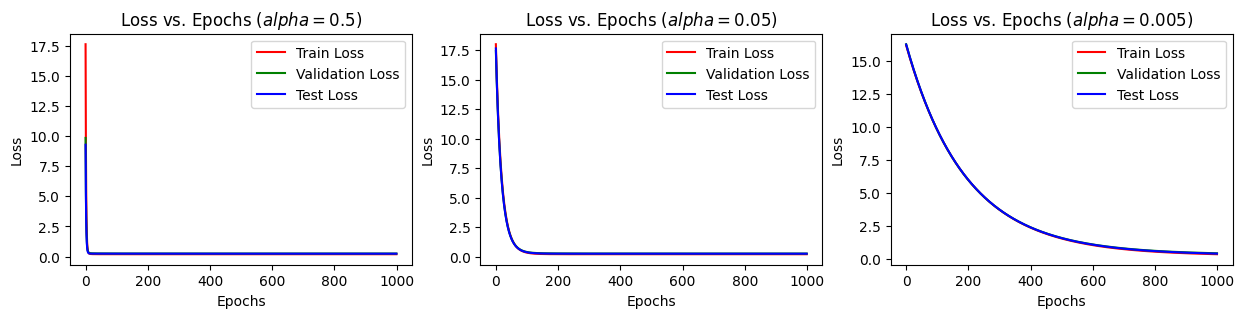

In [94]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr1}$)')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr2}$)')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}$)')

plt.show()

De las gráfocas anteriores podemos observar claramente la relación entre la velocidad de convergencia del modelo y el valor de la tasa de aprendizaje $\lambda$.

A continuación, veremos la insidencia de los tipos de regularización: L1; L2 y elastic-net, sobre nuestro modelo. Para efectos prácticos tomaremos $\lambda = 0.005$.

##### Efectos de la regularización L1 sobre el modelo

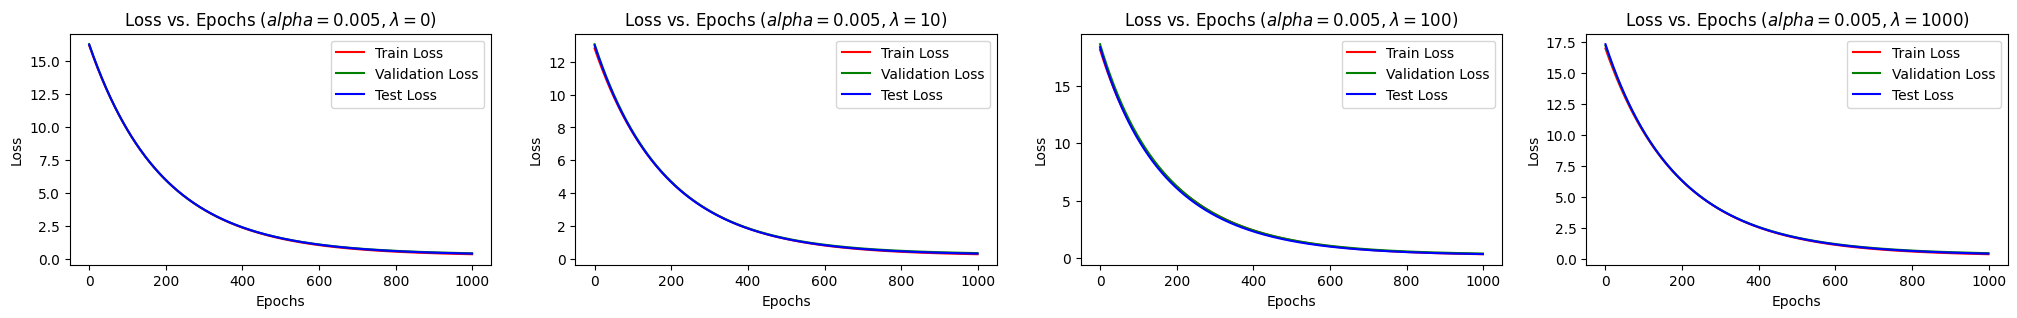

In [95]:
epochs_range = range(epochs)

plt.figure(figsize=(25, 3))
plt.subplot(1, 4, 1)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_1}$)')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_2}$)')

plt.subplot(1, 4, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_3}$)')

plt.subplot(1, 4, 4)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_4})$')

plt.show()

Al modificar los valores de $\lambda$ nos damos cuenta que no se ven fuertemente afectadas las predicciones de nuestros modelos. Observemos los valores de theta al cambiar los valores de $\lambda$:

In [96]:
print(f'lambda = {crl1_1}')
print(historicals[(lr3, crl1_1, 0)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl1_2}')
print(historicals[(lr3, crl1_2, 0)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl1_3}')
print(historicals[(lr3, crl1_3, 0)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl1_4}')
print(historicals[(lr3, crl1_4, 0)]['params'][-1].T)


lambda = 0
[[ 5.20058191  0.22731843  0.07034892  0.19307636 -0.03725336 -0.0067003
   0.17218091 -0.15123462 -0.06502602  0.1637025   0.13498205  0.39256137]]
-------------
lambda = 10
[[ 5.23988414  0.33201949 -0.0940696   0.07523243  0.00982357  0.05063122
   0.11516996 -0.11329315 -0.15940256  0.21918252  0.09140576  0.28518414]]
-------------
lambda = 100
[[ 5.18378386e+00  2.39468711e-01 -1.16485077e-01  8.44756402e-02
   1.16197848e-02 -5.55792225e-04 -4.83450306e-02  3.70491045e-02
  -6.73956300e-02  2.26351222e-01  1.26687748e-01  3.21941395e-01]]
-------------
lambda = 1000
[[ 5.19423691e+00  2.40889349e-01  1.04337225e-01  2.90808243e-01
  -1.04730764e-01  9.32384807e-03  2.35208573e-01 -1.84893171e-01
  -5.54482958e-05  2.84493583e-01  1.15364310e-01  4.10770556e-01]]


Si repetimos el ejercicio usando la regularización L2, podemos observar lo siguiente:

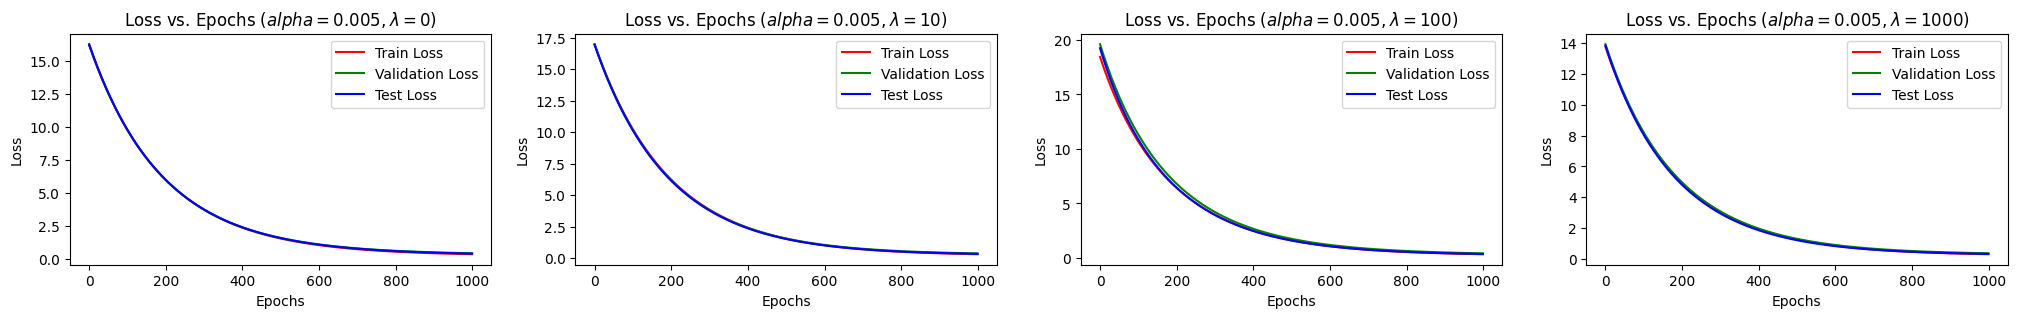

In [97]:
epochs_range = range(epochs)

plt.figure(figsize=(25, 3))
plt.subplot(1, 4, 1)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl2_1}$)')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl2_2}$)')

plt.subplot(1, 4, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl2_3}$)')

plt.subplot(1, 4, 4)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl2_4})$')

plt.show()

Ejecutemos ahora la regulación L2

In [98]:
print(f'lambda = {crl2_1}')
print(historicals[(lr3, crl1_1, crl2_1)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_2}')
print(historicals[(lr3, crl1_1, crl2_2)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_3}')
print(historicals[(lr3, crl1_1, crl2_3)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_4}')
print(historicals[(lr3, crl1_1, crl2_4)]['params'][-1].T)

lambda = 0
[[ 5.20058191  0.22731843  0.07034892  0.19307636 -0.03725336 -0.0067003
   0.17218091 -0.15123462 -0.06502602  0.1637025   0.13498205  0.39256137]]
-------------
lambda = 10
[[ 5.17642243  0.27535064 -0.05853517  0.16121175  0.04421209 -0.00842173
   0.10981541 -0.14531661 -0.18706032  0.23387445  0.1474247   0.21007401]]
-------------
lambda = 100
[[ 5.17621502  0.20859575 -0.07635194  0.02895249 -0.12284185  0.04324972
  -0.04416502  0.09928349  0.05967711  0.13578656  0.0763767   0.4803109 ]]
-------------
lambda = 1000
[[ 5.24086368  0.42012171 -0.08747328 -0.04688472  0.04050201  0.00730302
  -0.09079386  0.09405825 -0.21154407  0.21082239  0.20571708  0.30364465]]


Finalmente, ejecutemos el ejercicio con la regularización elastic-net

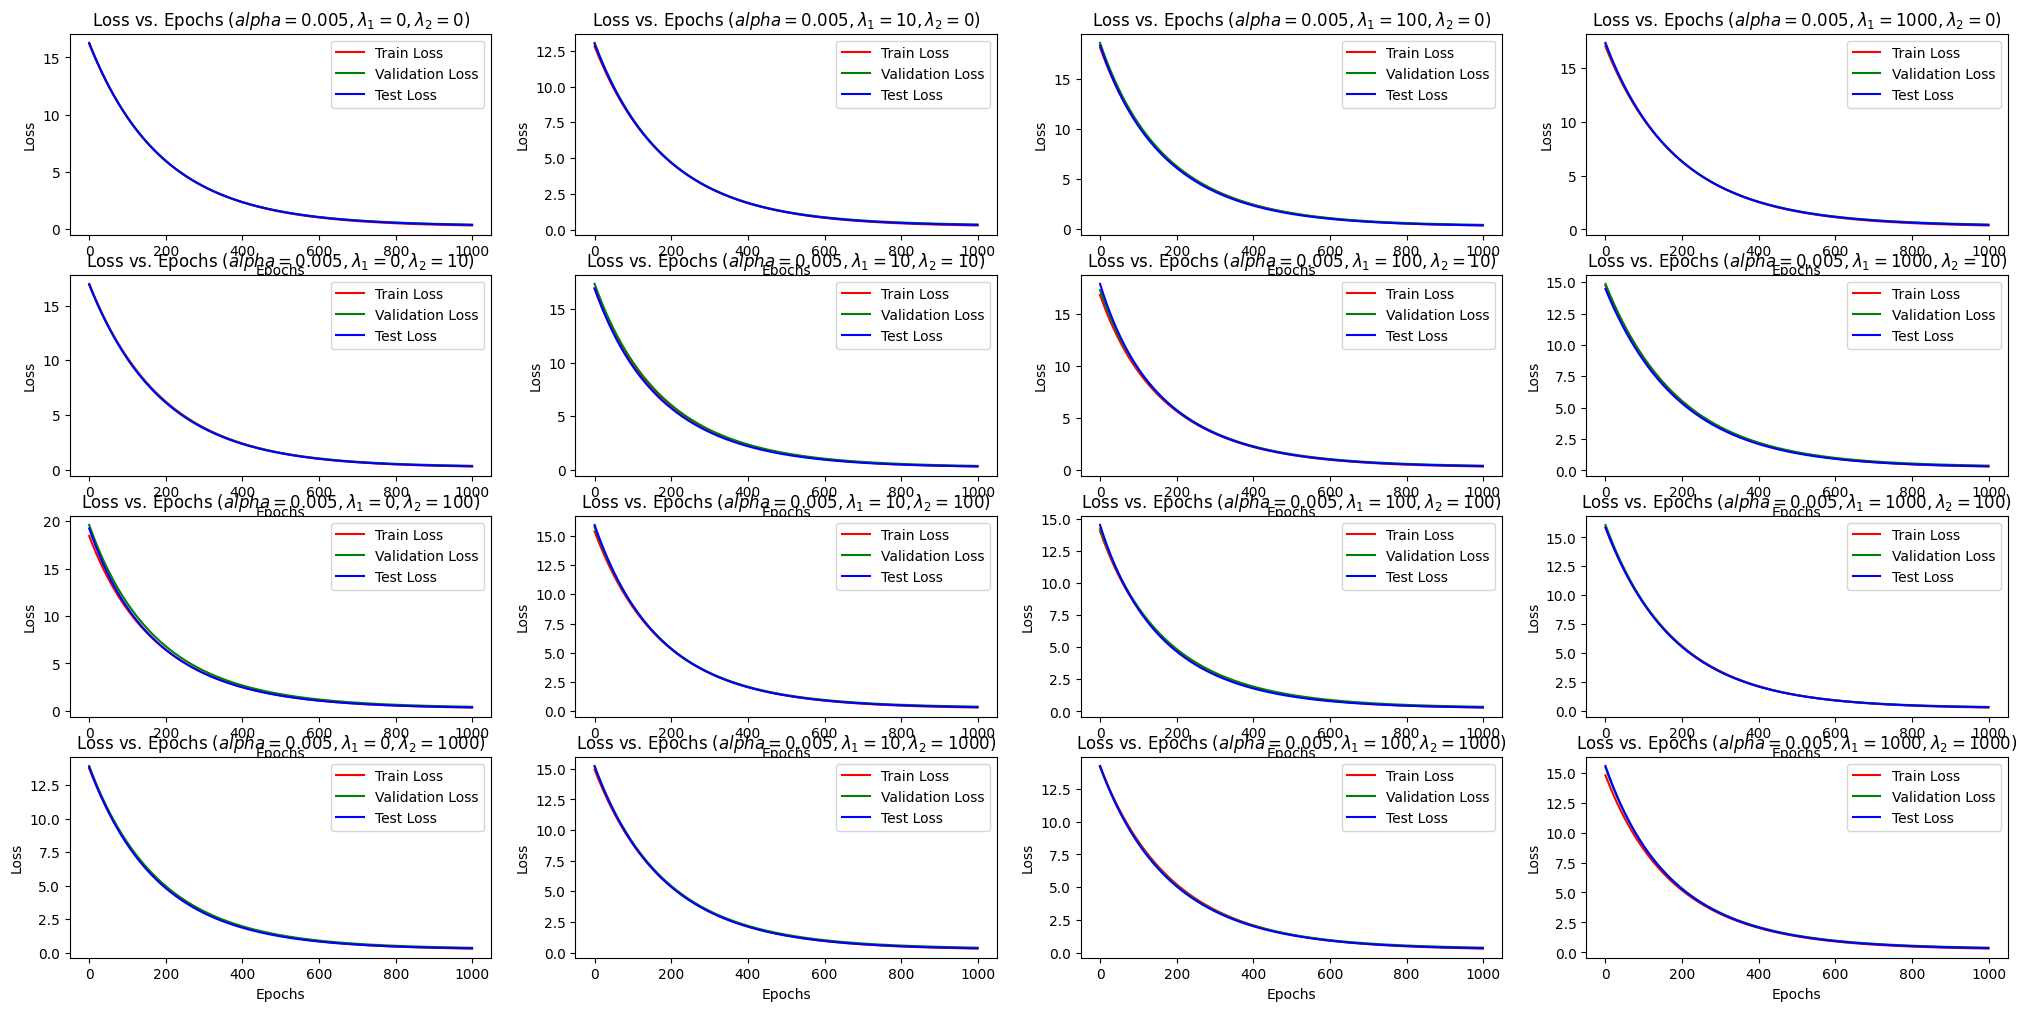

In [99]:
epochs_range = range(epochs)

plt.figure(figsize=(25, 12))
plt.subplot(4, 4, 1)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 2)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 4)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 5)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 6)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 7)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 8)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 9)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 10)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 11)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 12)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 13)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 14)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 15)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 16)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_4}$)')

plt.show()

De las gráficas anteriores podemos afirmar que el entrenamiento de nuestros modelos no se ve afectado por las constantes de regularización, o lo que es lo mismo, para este caso, la convergencia de nuestros modelos no se ve afectada por las constantes de regularización. Esto podría deberse a la naturaleza de los datos o a la cantidad de observaciones con las que estámos entrenando y validando a nuestros modelos.

Veamos que ocurre si en lugar de aplicar la regresión lineal, aplicamos la regresión logística:

#### Regresión logística

Antes de iniciar, debemos crear una nueva variable para nuestros datos. Dicha variable será del tipo categoríca y vendrá determinada por el porcentaje de calidad del conjunto de datos original. De ese modo, asignaremos el valor 1 a los datos que tengan una calidad mayor a $5$ y el valor 0 en los demás casos y trataremos de estimar esta "nueva" variable. 

In [100]:
def redefine_Y(Y):
    # Usar la vectorización para asignar nuevos valores basados en la condición
    Y = np.where(Y > 5, 1, 0)
    return Y

Y_train = redefine_Y(Y_train)
Y_val = redefine_Y(Y_val)
Y_test = redefine_Y(Y_test)

In [101]:
epochs = 1000
historicals = {}

for lr_value in lr_values:
    for CR_L1_value in CR_L1_values:
        for CR_L2_value in CR_L2_values:
            historicals[lr_value, CR_L1_value, CR_L2_value] = fit_logistic_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=lr_value, epochs=epochs)

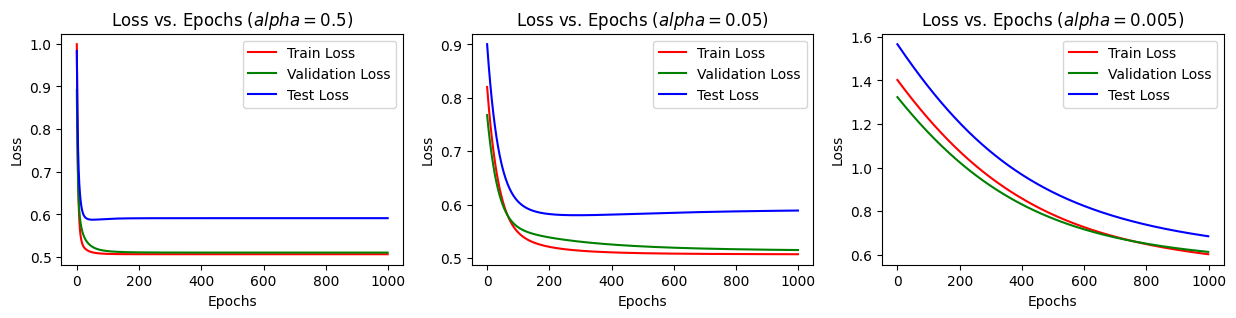

In [102]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr1, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr1}$)')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr2, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr2}$)')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}$)')

plt.show()

De lo anterior, podemos afirmar que al igual que en el caso de la regresión lineal, la velocidad de convergencia de nuestros modelos se ve directamente relacionada con la magnitud de la tasa de aprendizaje que elijamos. Para efectos prácticos del experimento, usaremos una tasa de aprendizaje de $\alpha=0.005$.

De ese modo, si calculamos las métricas usuales para estimar la calidad de nuestro modelo sobre los tres conjuntos de datos, obtendremos:

In [114]:
print('--------------------------------------------------')
print('Etapa de entrenamiento:')
print('--------------------------------------------------')
print('precision = ', calcular_precision(Y_train, historicals[(lr3, crl1_1, crl2_1)]['Y_train_pred']))
print('recall = ', calcular_recall(Y_train, historicals[(lr3, crl1_1, crl2_1)]['Y_train_pred']))
print('f1_score = ', calcular_f1_score(Y_train, historicals[(lr3, crl1_1, crl2_1)]['Y_train_pred']))
print('--------------------------------------------------')
print('Etapa de validación:')
print('--------------------------------------------------')
print('precision = ', calcular_precision(Y_val, historicals[(lr3, crl1_1, crl2_1)]['Y_val_pred']))
print('recall = ', calcular_recall(Y_val, historicals[(lr3, crl1_1, crl2_1)]['Y_val_pred']))
print('f1_score = ', calcular_f1_score(Y_val, historicals[(lr3, crl1_1, crl2_1)]['Y_val_pred']))
print('--------------------------------------------------')
print('Etapa de prueba:')
print('--------------------------------------------------')
print('precision = ', calcular_precision(Y_test, historicals[(lr3, crl1_1, crl2_1)]['Y_test_pred']))
print('recall = ', calcular_recall(Y_test, historicals[(lr3, crl1_1, crl2_1)]['Y_test_pred']))
print('f1_score = ', calcular_f1_score(Y_test, historicals[(lr3, crl1_1, crl2_1)]['Y_test_pred']))
print('--------------------------------------------------')

--------------------------------------------------
Etapa de entrenamiento:
--------------------------------------------------
precision =  0.7035881435257411
recall =  0.7466887417218543
f1_score =  0.7244979919678715
--------------------------------------------------
Etapa de validación:
--------------------------------------------------
precision =  0.6928104575163399
recall =  0.8091603053435115
f1_score =  0.7464788732394365
--------------------------------------------------
Etapa de prueba:
--------------------------------------------------
precision =  0.6206896551724138
recall =  0.75
f1_score =  0.679245283018868
--------------------------------------------------


De lo anterior, podemos concluir que el modelo tiene un rendimiento general satisfactorio. Predice correctamente si un vino es de buena calidad con una precisión del $62%$, lo que significa que el $62%$ de los vinos identificados como de buena calidad realmente lo son. Además, el modelo es capaz de identificar el $75%$ de los vinos tintos de buena calidad existentes en el conjunto de datos, lo cual refleja su capacidad de recall. Finalmente, el modelo muestra un equilibrio entre precisión y recall con un F1-Score del $68%$, indicando una buena eficacia en la estimación de vinos tintos de buena calidad entre aquellos identificados como tal.

Veamos ahora si el modelo logra verse afectado por los tipos de regularización.

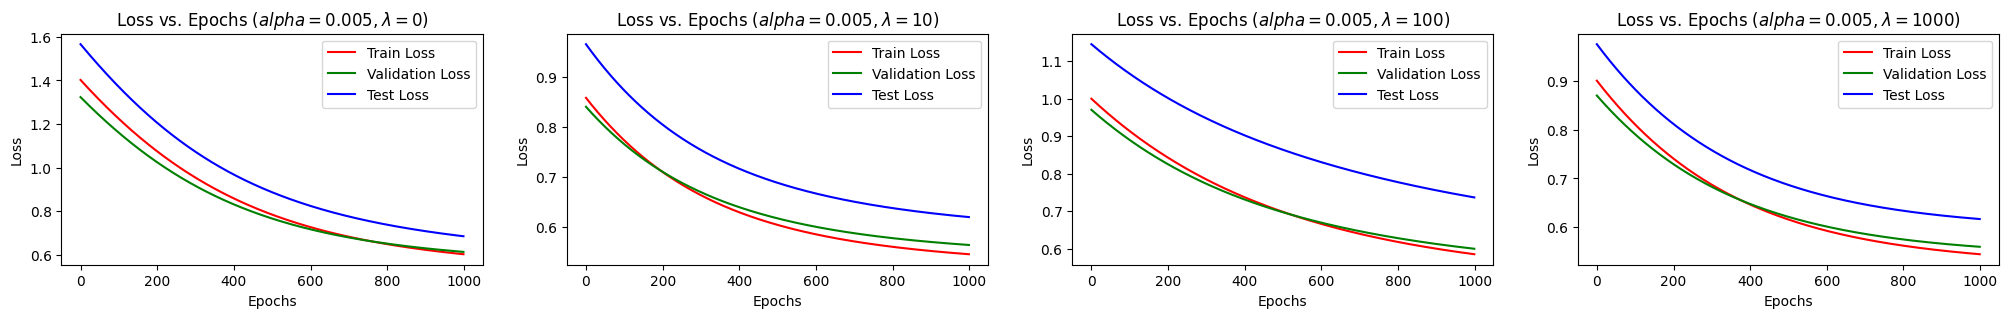

In [115]:
epochs_range = range(epochs)

plt.figure(figsize=(25, 3))
plt.subplot(1, 4, 1)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_1}$)')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_2}$)')

plt.subplot(1, 4, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_3}$)')

plt.subplot(1, 4, 4)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda = {crl1_4})$')

plt.show()

Ejecutemos ahora la regulación L2

In [116]:
print(f'lambda = {crl2_1}')
print(historicals[(lr3, crl1_1, crl2_1)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_2}')
print(historicals[(lr3, crl1_1, crl2_2)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_3}')
print(historicals[(lr3, crl1_1, crl2_3)]['params'][-1].T)
print('-------------')
print(f'lambda = {crl2_4}')
print(historicals[(lr3, crl1_1, crl2_4)]['params'][-1].T)

lambda = 0
[[ 0.41101438  0.28103511 -0.02523067  0.34289683  0.09903953  0.30973106
  -0.01719387  0.00300798  0.05629685  0.51610822  0.62598731  0.83081143]]
-------------
lambda = 10
[[ 0.50114766  0.16807865 -0.21877441  0.14851226 -0.10442361  0.39247702
  -0.05431712 -0.03745042  0.25101247  0.45960651  0.43969459  1.20516929]]
-------------
lambda = 100
[[ 0.33216866  0.71043297 -0.11139397  0.07374095  0.05571254  0.1180166
  -0.08354981 -0.00550157 -0.11790911  0.53030065  0.312562    0.96294829]]
-------------
lambda = 1000
[[ 0.22828433  0.39244133  0.02852922  0.52149704  0.31215829  0.03295835
  -0.07541456 -0.2806955  -0.31565273  0.69312829  0.55923579  0.51735163]]


Finalmente, ejecutemos el ejercicio con la regularización elastic-net

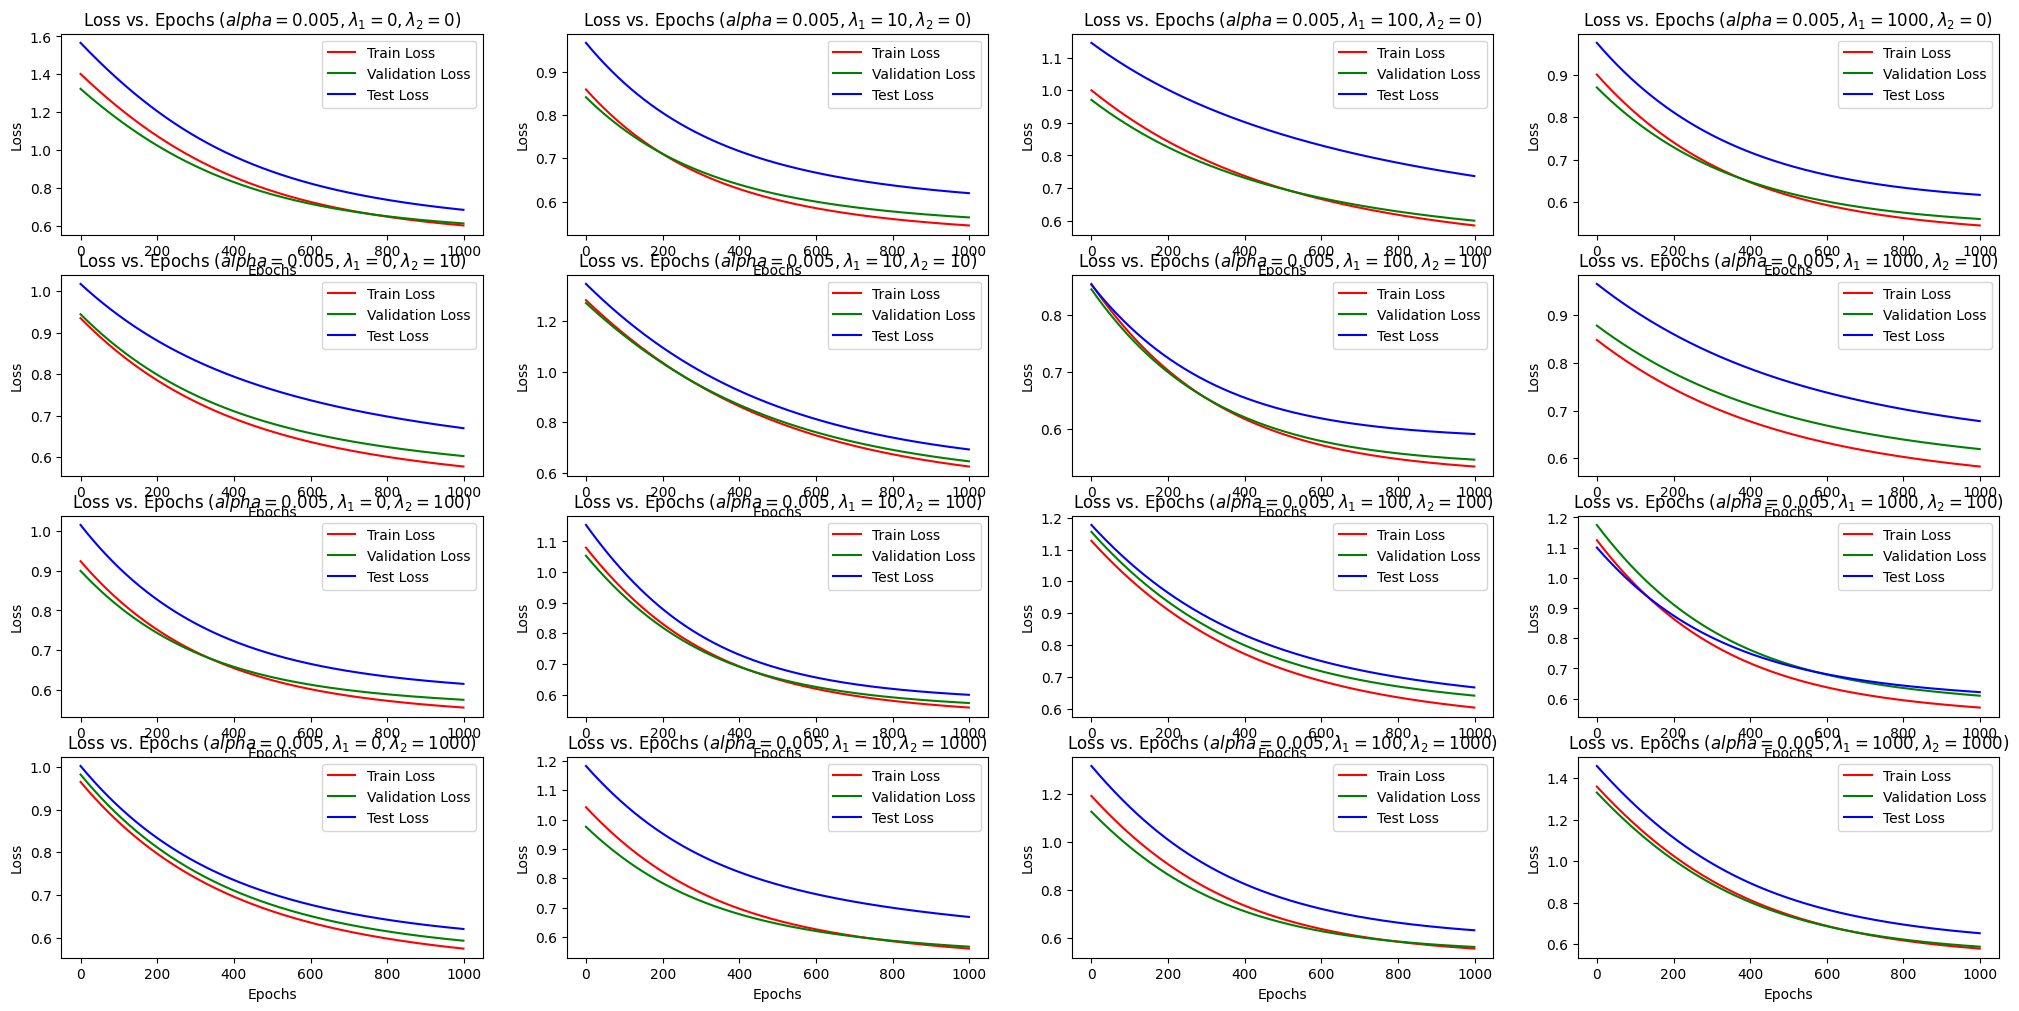

In [117]:
epochs_range = range(epochs)

plt.figure(figsize=(25, 12))
plt.subplot(4, 4, 1)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 2)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 3)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 4)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_1)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_1}$)')

plt.subplot(4, 4, 5)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 6)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 7)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 8)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_2)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_2}$)')

plt.subplot(4, 4, 9)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 10)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 11)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 12)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_3)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_3}$)')

plt.subplot(4, 4, 13)
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_1, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_1}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 14)
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_2, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_2}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 15)
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_3, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_3}, \lambda_2 = {crl2_4}$)')

plt.subplot(4, 4, 16)
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['train_losses'], label='Train Loss', color='red')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['val_losses'], label='Validation Loss', color='green')
plt.plot(epochs_range, historicals[(lr3, crl1_4, crl2_4)]['test_losses'], label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Loss vs. Epochs ($alpha = {lr3}, \lambda_1 = {crl1_4}, \lambda_2 = {crl2_4}$)')

plt.show()

Podemos observar que a pesar de que la regularización parece afectar tanto el proceso de entrenamiento como el proceso de validación, las soluciones (o los valores de los coeficientes de theta) tienden a un valor de error muy similar.

Esto último nos invita a pensar que nuesto conjunto de datos, y por ende, los modelos que se entrenen sobre el mismo, podrían llegar a ser resistentes frente a los tipos de regularización conocidos. Sin embargo, vale la pena resaltar que podría ocurrir en el contexto del estudio debido a la naturaleza de los datos o a la magnitud con la que cuentan los distintos conjuntos de datos.

## Conclusiones